# **Predicting the 2024 US Presidential Elections: Insights, Challenges, and Data-Driven Strategies**


The 2024 US Presidential Elections are anticipated to be one of the most consequential in recent history. Leveraging data from past elections, we aim to build predictive models that give us insights into potential outcomes. In this project, we'll explore how historical polling data can guide our forecasts, discuss the limitations of such predictions, and experiment with various modeling techniques to see what works best.

>**Disclaimer**: This project is not political in nature; it only uses the upcoming U.S. presidential election purely as an educational example for learning machine learning and data science concepts. 

Our prediction target is the vote share for each candidate, which is the estimated percentage of votes each candidate (Democratic, Republican, or Independent) is expected to receive. Key features influencing this prediction include whether there’s an incumbent, party affiliation (Democratic, Republican, or Independent), historical voting trends and others.

## Overview of the approach
We'll analyze polling trends from past election cycles, incorporate additional features to capture recent dynamics, and explore different machine learning models to predict state-by-state outcomes.


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background">Background</a>
        <ol>
            <li><a href="#Exploratory-Data-Analysis-(EDA)">Exploratory Data Analysis (EDA)</a></li>
            <li><a href="#Feature-Engineering-Overview">Feature Engineering Overview</a></li>
            <li><a href="#Ensemble-Learning">Ensemble Learning</a></li>
        </ol>
    </li>
    <li><a href="#Data-Acquisition:-FiveThirtyEight-and-Federal-Election-Commission">Data Acquisition: FiveThirtyEight and Federal Election Commission</a></li>
    <li>
        <a href="#Exploratory-Data-Analysis-and-Data-Cleaning">Exploratory Data Analysis and Data Cleaning</a>
        <ol>
            <li><a href="#Estimated-vs.-trend-adjusted-percentage">Estimated vs. trend-adjusted percentage</li>
            <li><a href="#Adding-party-column-and-historical-result-data">Adding party column and historical result data</li>
            <li><a href="#Cleaning-up-columns">Cleaning up columns</li>
        </ol>
    </li>
    <li><a href="#2024-Campaign-Overview">2024 Campaign Overview</a></li>
    <li>
        <a href="#Feature-Engineering">Feature Engineering</a>
        <ol>
            <li><a href="#Opponent-Based-Features">Opponent-Based Features</a></li>
            <li><a href="#Temporal-Features">Temporal Features</a></li>
            <li><a href="#Candidate-Specific-Features">Candidate-Specific Features</a></li>
            <li><a href="#Party-Focused-Features">Party-Focused Features</a></li>
        </ol> 
    </li>
    <li><a href="#Predicting-The-2024-US-Elections-Results">Predicting The 2024 US Elections Results</a></li>
    <li>
        <a href="#Exercises">Addons</a>
        <ol>
            <li><a href="#Exercise-1:-Introducing-more-features">Addon 1 - Introducing more features</a></li>
            <li><a href="#Exercise-2:-Hyperparameter-tuning-the-models">Addon 2 - Hyperparameter tuning the models</a></li>
        </ol>
    </li>
    <li><a href="#Conclusion">Conclusion</li>
</ol>


# Objectives

After completing this lab you will be able to:

1. **Understand the context of polling data**  
   - Explain the limitations of polling data as indicators of public sentiment rather than definitive predictors of election outcomes.
   - Highlight the importance of accounting for the unique political landscape of each swing state.
     

2. **Use feature engineering for enhanced predictions**  
   
3. **Design a regression-based prediction strategy**  
   - Develop a regression-based approach that predicts election outcomes for each polling observation individually.

4. **Train and test models with proper time segmentation**  
   - Ensure models are trained on data from past election cycles and tested on unseen future cycles to prevent data leakage.
   - Apply time-based weighting with an exponential decay function to prioritize recent polling data.

5. **Implement a strategy for 2024 prediction**  
   - Train the best-performing model for each state using data from all election cycles up to 2020.
   - Use the trained models to predict vote shares and the winning candidate for the 2024 US Presidential Election, with adjustments to account for the most recent campaign events and trends.

6. **Explore alternative approaches and enhancements**  
   - Consider using ensemble models, classification approaches, economic indicators, and social media sentiment to enhance predictive accuracy.
   - Experiment with different feature engineering techniques, evaluation metrics, and decay functions for more robust predictions.


----


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [5]:
%%capture
%pip install -q numpy==2.1.3
%pip install -q pandas==2.2.3
%pip install -q matplotlib==3.9.2
%pip install -q seaborn==0.13.2
%pip install -q scikit-learn==1.5.2
%pip install -q lightgbm==4.5.0 
%pip install -q xgboost==2.1.2

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [6]:
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

# Background

Before diving into our analysis and prediction strategy for the 2024 US Elections, it is essential to understand the following concepts:

1. ### Exploratory Data Analysis (EDA)
- **What EDA does**: [EDA](https://www.ibm.com/topics/exploratory-data-analysis?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-us2024-election-lab-v1) is the process of analyzing and summarizing the main characteristics of a dataset, often using visualizations. It helps identify patterns, spot anomalies, and understand the relationships between different features.
- **How EDA works**: EDA involves techniques such as summary statistics, correlation analysis, and data visualization (e.g., histograms, scatter plots, box plots). These methods provide a deeper understanding of the data and inform subsequent feature engineering and modeling decisions.

2. ### Feature Engineering Overview
- **What feature engineering does**: [Feature engineering](https://www.ibm.com/topics/feature-engineering?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-us2024-election-lab-v1) involves creating new features or transforming existing ones to make data more suitable for modeling. It helps extract meaningful information from raw data, allowing machine learning models to perform better.
- **How feature engineering works**: It can include techniques such as creating rolling averages, calculating momentum, generating lag features, and encoding categorical variables. In this notebook, we will engineer features like days until the election, rolling averages for poll percentages, and momentum indicators to capture trends and shifts in voter sentiment.

3. ### Ensemble Learning 
- **What ensemble learning does**: [Ensemble learning](https://www.ibm.com/topics/ensemble-learning?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-us2024-election-lab-v1) is a powerful machine learning technique that combines the predictions from multiple models to improve overall accuracy and robustness. Instead of relying on a single model, ensemble methods leverage the strengths of diverse models by integrating them to make a more accurate and reliable final prediction. This approach helps mitigate the limitations of individual models, such as bias and variance, by incorporating a variety of perspectives, which ultimately enhances performance. Common ensemble techniques include **bagging** (e.g., Random Forests), **boosting** (e.g., Gradient Boosting Machines), and **stacking**, each using different strategies to combine models effectively. Ensemble learning is widely used in applications where prediction accuracy is critical, as it often outperforms single-model approaches by capturing more intricate patterns within the data.

Understanding these concepts will help you follow the technical implementation and appreciate the methods used to analyze and predict the 2024 US Elections.


# Data Acquisition: FiveThirtyEight and Federal Election Commission

The prediction data used in this analysis is sourced from [FiveThirtyEight](https://projects.fivethirtyeight.com/polls/), which aggregates polling information from numerous polling organizations. This data set spans election cycles dating back to 1968 and is available to the public on their GitHub [repository](https://github.com/fivethirtyeight/data/tree/master).

Our methodology leverages their polling model, which calculates an average poll percentage for each candidate across various states, covering nearly every day within the eight months leading up to the election.

We start by loading polling data for the years 2024, 2020, and earlier cycles from CSV files. For 2024, we restrict the data to polls from the current election cycle. We then merge the historical data from 2016 and prior years with the 2020 data. In the resulting DataFrames, `polls_24` and `polls_until_20`, we ensure consistency by converting date columns to datetime format and retaining key columns such as cycle, state, candidate name, and polling estimates.


In [7]:
# Reading csv files
polls_24 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Seajal9QNMDlBKfzc5Kpaw/presidential-general-averages.csv')
polls_20 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/knh9Y6QVeSDqFb2dZejjdA/presidential-poll-averages-2020.csv')
polls_until_16 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/cVut-n5JrpJcrXKX9A7jIA/pres-pollaverages-1968-2016.csv')

# Filtering and concatenating DataFrames
polls_24 = polls_24[polls_24['cycle'] == 2024]
polls_until_20 = pd.concat([polls_20, polls_until_16], ignore_index=True)

# Making sure dates are in datetime format
polls_24['date'] = pd.to_datetime(polls_24['date'], format='%Y-%m-%d')
polls_until_20['modeldate'] = pd.to_datetime(polls_until_20['modeldate'])

# Keeping only the columns of interest
polls_until_20 = polls_until_20[['cycle', 'state', 'modeldate', 'candidate_name', 'pct_estimate', 'pct_trend_adjusted']]

The features for the 2024 dataset, `polls_24`, are shown here. Our primary focus is on polling data, which represents sampled opinions from the public to help predict the likely winner of the election.
<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>candidate</b></td>
      <td>The name of the candidate being polled, such as "Trump" or "Harris".</td>
    </tr>
    <tr>
      <td><b>date</b></td>
      <td>The date of the poll, formatted as YYYY-MM-DD, indicating when the poll was conducted.</td>
    </tr>
    <tr>
      <td><b>pct_trend_adjusted</b></td>
      <td>A trend-adjusted percentage, which takes into account historical data and trends to smooth fluctuations. (May contain NaN values if unavailable)</td>
    </tr>
    <tr>
      <td><b>state</b></td>
      <td>The U.S. state where the poll was conducted, such as "Arizona".</td>
    </tr>
    <tr>
      <td><b>cycle</b></td>
      <td>The election cycle year, indicating the relevant election year, such as 2024.</td>
    </tr>
    <tr>
      <td><b>party</b></td>
      <td>The political party of the candidate, typically "REP" (Republican), "DEM" (Democrat), or "IND" (Independent).</td>
    </tr>
    <tr>
      <td><b>pct_estimate</b></td>
      <td>The estimated vote share percentage for each candidate, based on the poll results.</td>
    </tr>
    <tr>
      <td><b>hi</b></td>
      <td>The upper bound of the vote share estimate, representing a higher confidence level in the candidate’s predicted support.</td>
    </tr>
    <tr>
      <td><b>lo</b></td>
      <td>The lower bound of the vote share estimate, representing a lower confidence level in the candidate’s predicted support.</td>
    </tr>
  </tbody>
</table>


In [8]:
polls_24.head()

candidate       date  pct_trend_adjusted    state  cycle party  \
21300     Trump 2024-10-29                 NaN  Arizona   2024   REP   
21301    Harris 2024-10-29                 NaN  Arizona   2024   DEM   
21302     Trump 2024-10-28                 NaN  Arizona   2024   REP   
21303    Harris 2024-10-28                 NaN  Arizona   2024   DEM   
21304     Trump 2024-10-27                 NaN  Arizona   2024   REP   

       pct_estimate         hi         lo  
21300      48.69350  50.002575  47.253310  
21301      46.83210  48.221905  45.462875  
21302      48.67395  49.998210  47.306692  
21303      46.77425  48.183605  45.402925  
21304      48.68695  50.014985  47.302782

Some  features for the 1968-2020 dataset, ```polls_until_20```, are shown here. Once again, the primary focus is on polling data, which we’ll use as the training and validation dataset. Now we need the actual voting results. 


In [9]:
polls_until_20.head()

cycle          state  modeldate       candidate_name  pct_estimate  \
0   2020        Wyoming 2020-11-03  Joseph R. Biden Jr.      30.81486   
1   2020      Wisconsin 2020-11-03  Joseph R. Biden Jr.      52.12642   
2   2020  West Virginia 2020-11-03  Joseph R. Biden Jr.      33.49125   
3   2020     Washington 2020-11-03  Joseph R. Biden Jr.      59.34201   
4   2020       Virginia 2020-11-03  Joseph R. Biden Jr.      53.74120   

   pct_trend_adjusted  
0            30.82599  
1            52.09584  
2            33.51517  
3            59.39408  
4            53.72101




The actual voting results by state were obtained directly from the [Federal Election Commission](https://www.fec.gov/introduction-campaign-finance/election-results-and-voting-information/) of the USA. To streamline the analysis, the data has been processed and consolidated into a single CSV file.

Each record in this data set represents a unique combination of election cycle, state, and party, along with the name of the candidate and the percentage of votes they received.


In [10]:
# Importing result data
results_until_20 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/tZjlzxTlT0mhKo_zs82e_w/results.csv', sep=';')
results_until_20 = results_until_20[['cycle', 'state', 'party', 'candidate', 'vote_share']]
results_until_20.head()

cycle       state party     candidate   vote_share
0   2012     Alabama   DEM  Barack Obama   38,3590331
1   2012      Alaska   DEM  Barack Obama  40,81265911
2   2012     Arizona   DEM  Barack Obama  44,58976694
3   2012    Arkansas   DEM  Barack Obama   36,8789903
4   2012  California   DEM  Barack Obama  60,23895914

Most U.S. states consistently vote for either the Democratic or Republican party, while swing states can shift between parties and are therefore the most crucial to predict. Voting patterns in these states often fluctuate, making them particularly significant in determining election outcomes.

To ensure our analysis is relevant and based on high-quality data, we will apply two main restrictions:

1. **Election Cycle Focus**: We'll limit the data to the last six election cycles (beginning from 2000), as data accuracy and availability have greatly improved in recent years.

2. **Swing State Analysis**: Our analysis will focus on swing states—those with highly competitive races—identified by [FiveThirtyEight’s forecast](https://projects.fivethirtyeight.com/2024-election-forecast/?cid=rrpromo), where the leading candidate has less than a five percent advantage. The selected swing states are Pennsylvania, Wisconsin, Michigan, Georgia, North Carolina, Arizona, and Nevada. We assume other states will vote predictably, so we’ll define `swing_states`, `blue_states`, and `red_states` lists to create targeted data subsets for the swing states.

Let's filter out old election cycles.


In [11]:
# Implementing cycle restriction
start_cycle = 2000
print("Length before we filter the cycles ", polls_until_20.shape)
polls_until_20 = polls_until_20[polls_until_20['cycle'] >= start_cycle]
print("Length after we filter the cycles ", polls_until_20.shape)

Length before we filter the cycles  (246558, 6)
Length after we filter the cycles  (153249, 6)


Let's filter out the swing states.


In [12]:
# Defining state lists
swing_states = ['Pennsylvania', 'Wisconsin', 'Michigan', 'Georgia', 'North Carolina', 'Arizona', 'Nevada']
blue_states = ['District of Columbia', 'Vermont', 'Massachusetts', 'Maryland', 'Hawaii', 'California', 'ME-1', 'Connecticut', 'Washington', 'Delaware', 'Rhode Island', 'New York', 'Illinois', 'New Jersey', 'Oregon', 'Colorado', 'Maine', 'New Mexico', 'Virginia', 'New Hampshire', 'NE-2', 'Minnesota']
red_states = ['Wyoming', 'West Virginia', 'Oklahoma', 'North Dakota', 'Idaho', 'South Dakota', 'Arkansas', 'Kentucky', 'NE-3', 'Alabama', 'Tennessee', 'Utah', 'Louisiana', 'Nebraska', 'Mississippi', 'Montana', 'NE-1', 'Indiana', 'Kansas', 'Missouri', 'South Carolina', 'Alaska', 'Ohio', 'Iowa', 'Texas', 'ME-2', 'Florida']

# Defining swing state subset of the poll data
swing_until_20 = polls_until_20[polls_until_20['state'].isin(swing_states)]
swing_24 = polls_24[polls_24['state'].isin(swing_states)]

In [13]:
swing_until_20.shape

(23712, 6)

In [14]:
swing_until_20.head()

cycle           state  modeldate       candidate_name  pct_estimate  \
1    2020       Wisconsin 2020-11-03  Joseph R. Biden Jr.      52.12642   
12   2020    Pennsylvania 2020-11-03  Joseph R. Biden Jr.      50.22000   
17   2020  North Carolina 2020-11-03  Joseph R. Biden Jr.      48.90633   
22   2020          Nevada 2020-11-03  Joseph R. Biden Jr.      49.62386   
31   2020        Michigan 2020-11-03  Joseph R. Biden Jr.      51.17806   

    pct_trend_adjusted  
1             52.09584  
12            50.20422  
17            48.90359  
22            49.65657  
31            51.15482

In [15]:
swing_24.shape

(4394, 9)

In [16]:
swing_24.head()

candidate       date  pct_trend_adjusted    state  cycle party  \
21300     Trump 2024-10-29                 NaN  Arizona   2024   REP   
21301    Harris 2024-10-29                 NaN  Arizona   2024   DEM   
21302     Trump 2024-10-28                 NaN  Arizona   2024   REP   
21303    Harris 2024-10-28                 NaN  Arizona   2024   DEM   
21304     Trump 2024-10-27                 NaN  Arizona   2024   REP   

       pct_estimate         hi         lo  
21300      48.69350  50.002575  47.253310  
21301      46.83210  48.221905  45.462875  
21302      48.67395  49.998210  47.306692  
21303      46.77425  48.183605  45.402925  
21304      48.68695  50.014985  47.302782

In [17]:
swing_until_20.dtypes

cycle                          int64
state                         object
modeldate             datetime64[ns]
candidate_name                object
pct_estimate                 float64
pct_trend_adjusted           float64
dtype: object

To better understand the data, let's look at Trump’s chances in the 2020 election for example. This code filters the dataset to focus specifically on his polling estimates in Pennsylvania. It then creates a time series plot where the x-axis (`modeldate`) shows dates over this period, and the y-axis represents two lines: `pct_estimate` (Trump’s raw estimated support percentage) and `pct_trend_adjusted` (the trend-adjusted estimate that smooths fluctuations). This visualization helps us see both the immediate polling estimates and the overall trend in Trump’s predicted support in Pennsylvania as the election approached.


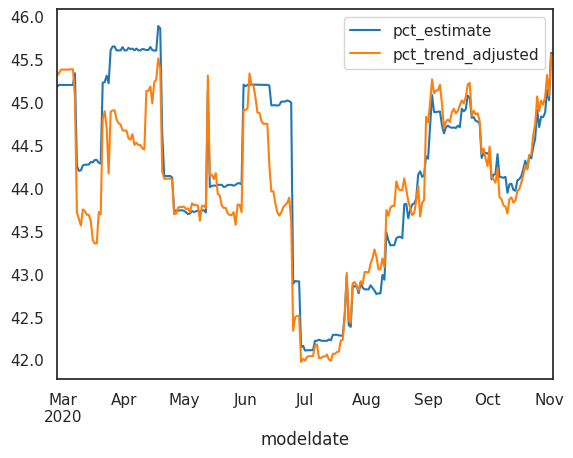

In [20]:
swing_until_20[(swing_until_20['state'] == 'Pennsylvania') & 
               (swing_until_20['candidate_name'] == 'Donald Trump') & 
               (swing_until_20['cycle'] == 2020)].plot(x='modeldate',y=['pct_estimate','pct_trend_adjusted'])
plt.show()

This plot shows a comparison between Donald Trump’s raw polling estimates and trend-adjusted estimates in Pennsylvania from March to November 2020. 

- The **blue line** (`pct_estimate`) represents Trump’s raw polling estimates over time, showing the immediate, unadjusted support percentage in each poll.
- The **orange line** (`pct_trend_adjusted`) is a trend-adjusted version of these estimates, smoothing out fluctuations to provide a clearer view of the overall trend in Trump’s support.

### Observations:
- **Fluctuations**: The raw polling estimates (blue) show more volatility, with several sharp drops and rises, especially in the early and middle months.
- **Trend Stability**: The trend-adjusted line (orange) smooths these fluctuations, offering a more stable picture of Trump's support trajectory.
- **Low Point in Summer**: Both lines show a noticeable drop in support around July, with the lowest point just above 42%.
- **Recovery in Fall**: From August onward, both the raw and trend-adjusted lines indicate a steady recovery in Trump’s support leading up to November, with both lines converging near 46%.

This dual-line plot helps visualize both the day-to-day polling data and the broader trend in Trump’s predicted support, providing a more comprehensive understanding of his position in Pennsylvania as the election neared.


# Exploratory Data Analysis and Data Cleaning


To get an overview of our data, we start with exploratory data analysis (EDA). We use a combination of the `.isnull()` and `.sum()` methods to identify which columns are present in each DataFrame and to check for any missing values. We will also check some basic statistics for our dataframes.


In [21]:
# Checking for missing values in swing_24 and swing_until_20
print("Missing values in 2024 data:")
print(swing_24.isnull().sum())
print("\nMissing values in historical data:")
print(swing_until_20.isnull().sum())

Missing values in 2024 data:
candidate                0
date                     0
pct_trend_adjusted    4394
state                    0
cycle                    0
party                    0
pct_estimate             0
hi                       0
lo                       0
dtype: int64

Missing values in historical data:
cycle                 0
state                 0
modeldate             0
candidate_name        0
pct_estimate          0
pct_trend_adjusted    0
dtype: int64


In [22]:
# Checking basic statistics
print("\nBasic Statistics for 2024 Data:")
print(swing_24.describe())

print("\nBasic Statistics for Historical Data:")
print(swing_until_20.describe())


Basic Statistics for 2024 Data:
                                date  pct_trend_adjusted   cycle  \
count                           4394                 0.0  4394.0   
mean   2024-06-19 00:59:58.361401856                 NaN  2024.0   
min              2024-03-01 00:00:00                 NaN  2024.0   
25%              2024-04-22 00:00:00                 NaN  2024.0   
50%              2024-06-13 00:00:00                 NaN  2024.0   
75%              2024-08-16 00:00:00                 NaN  2024.0   
max              2024-10-29 00:00:00                 NaN  2024.0   
std                              NaN                 NaN     0.0   

       pct_estimate           hi           lo  
count   4394.000000  4394.000000  4394.000000  
mean      34.281900    36.497980    32.071943  
min        2.852455     4.606868     1.019715  
25%       10.837125    13.474747     8.265628  
50%       41.801425    44.165899    39.534311  
75%       45.387613    47.555166    43.258924  
max       48.89180

As we can see, the column names differ between the two DataFrames, and the `party` column appears to be missing in `swing_until_20`. Additionally, there are two types of percentages: an estimated percentage and a trend-adjusted percentage. However, the trend-adjusted percentage is not available for the 2024 data. We will explore this discrepancy in more detail later.

Next, let’s check for the distinct values of each of our categorical variables.


In [23]:
# Checking distinct values for categorical variables
print("\n2024 Data Overview:")
print(f"Earliest Polling Date: {swing_24['date'].min()}")
print(f"Latest Polling Date: {swing_24['date'].max()}")
print(f"Distinct States: {swing_24['state'].unique().tolist()}")
print(f"Distinct Parties: {swing_24['party'].unique().tolist()}")
print(f"Distinct Candidates: {swing_24['candidate'].unique().tolist()}")

print("\nHistorical Data Overview:")
print(f"Earliest Polling Date: {swing_until_20['modeldate'].min()}")
print(f"Latest Polling Date: {swing_until_20['modeldate'].max()}")
print(f"Distinct States: {swing_until_20['state'].unique().tolist()}")
print(f"Distinct Candidates: {swing_until_20['candidate_name'].unique().tolist()}")


2024 Data Overview:
Earliest Polling Date: 2024-03-01 00:00:00
Latest Polling Date: 2024-10-29 00:00:00
Distinct States: ['Arizona', 'Georgia', 'Michigan', 'Nevada', 'North Carolina', 'Pennsylvania', 'Wisconsin']
Distinct Parties: ['REP', 'DEM', 'IND']
Distinct Candidates: ['Trump', 'Harris', 'Kennedy', 'Biden']

Historical Data Overview:
Earliest Polling Date: 2000-03-02 00:00:00
Latest Polling Date: 2020-11-03 00:00:00
Distinct States: ['Wisconsin', 'Pennsylvania', 'North Carolina', 'Nevada', 'Michigan', 'Georgia', 'Arizona']
Distinct Candidates: ['Joseph R. Biden Jr.', 'Donald Trump', 'Convention Bounce for Joseph R. Biden Jr.', 'Convention Bounce for Donald Trump', 'Hillary Rodham Clinton', 'Gary Johnson', 'Barack Obama', 'Mitt Romney', 'John McCain', 'George W. Bush', 'John Kerry', 'Al Gore', 'Ralph Nader']


While the data appears accurate for states and dates, there are a few notable issues with the candidate-related columns. The historical data, particularly from the 2020 cycle, includes not only the percentages for the two main candidates but also entries for convention bounces—temporary increases in support following national conventions. Additionally, the `swing_24` DataFrame seems to be missing first names for the candidates.

To proceed with our analysis of the different types of percentages, it is essential to remove the convention bounce observations right away.


In [24]:
# Removing 'Convention Bounce' observations from historical data
print("Data before we remove the convention bounce ",swing_until_20.shape)
swing_until_20 = swing_until_20[~swing_until_20['candidate_name'].str.startswith('Convention Bounce')]
print("Data after we remove the convention bounce ",swing_until_20.shape)

Data before we remove the convention bounce  (23712, 6)
Data after we remove the convention bounce  (22683, 6)


We also perform some visualizations to get a clearer picture of the distribution of polls by state and candidate.


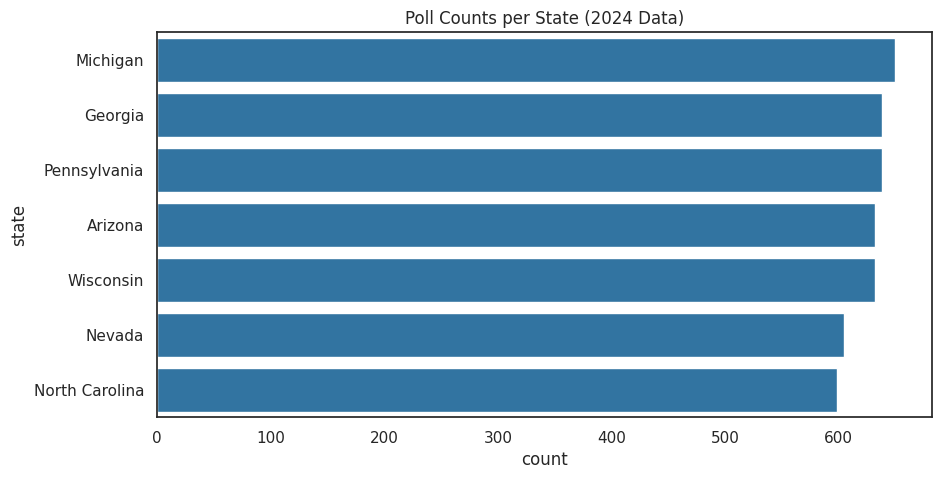

In [25]:
# Visualizing the distribution of states in 2024 data
plt.figure(figsize=(10, 5))
sns.countplot(y='state', data=swing_24, order=swing_24['state'].value_counts().index)
plt.title("Poll Counts per State (2024 Data)")
plt.show()

The plot shows the number of poll observations collected for each swing state in the 2024 dataset. Each bar represents a different state, and the length of the bar corresponds to the total number of polls conducted in that state.


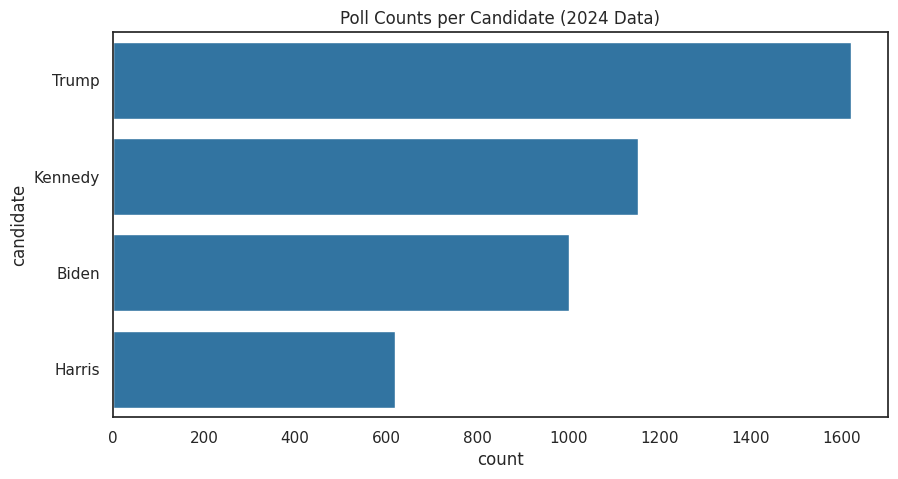

In [26]:
# Visualizing candidate distributions
plt.figure(figsize=(10, 5))
sns.countplot(y='candidate', data=swing_24, order=swing_24['candidate'].value_counts().index)
plt.title("Poll Counts per Candidate (2024 Data)")
plt.show()

This plot shows the distribution of poll observations among candidates running in the 2024 election. If a candidate has significantly more poll counts, it may indicate higher public interest or media focus on that candidate.


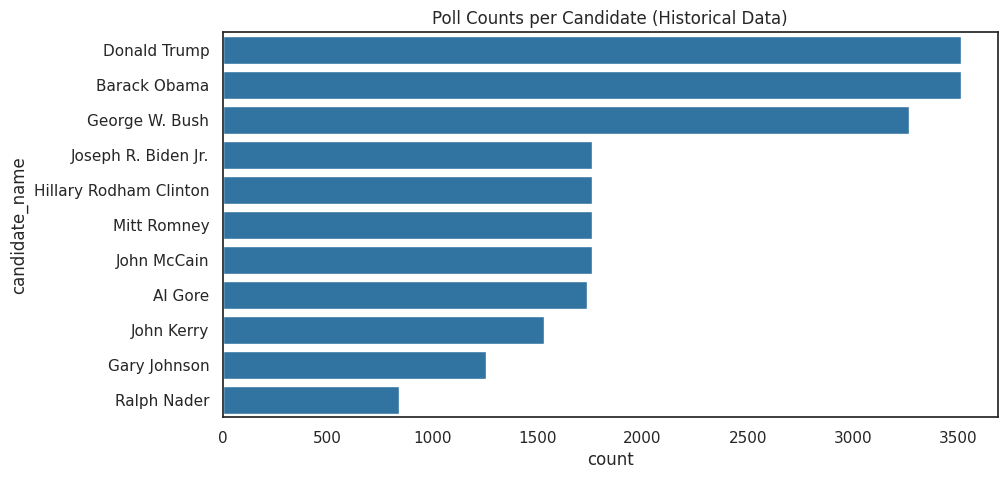

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(y='candidate_name', data=swing_until_20, order=swing_until_20['candidate_name'].value_counts().index)
plt.title("Poll Counts per Candidate (Historical Data)")
plt.show()

This plot provides a historical perspective, showing which candidates have been frequently polled in past election cycles. It can highlight major figures from previous elections and help identify trends in polling focus over time.


## Estimated vs. trend-adjusted percentage


To ensure uniformity, the type of percentage used must be consistent across all training and testing data. We observed that while data up to the 2020 election contains both estimated and  [trend-adjusted](https://www.indeed.com/career-advice/career-development/how-to-calculate-trend-percentage) percentages, the 2024 data includes only estimated percentages. This presents us with two possible approaches:

- Use the estimated percentage for all election cycles
- Develop our own trend-adjusted percentage for the 2024 data

Given the unclear methodology for calculating historical trend-adjusted percentages, it is necessary to explore the relationship between estimated and trend-adjusted percentages before cleaning the data. This analysis is crucial for our predictions, so we will start by investigating the **correlation and average difference** in the historical dataset.


In [28]:
# Checking the correlation between the percentages
adj_corr_swing = swing_until_20['pct_estimate'].corr(swing_until_20['pct_trend_adjusted'])
print('Correlation between estimated and trend-adjusted percentage in swing states: ' + str(adj_corr_swing))

# Calculate the mean difference between pct_estimate and pct_trend_adjusted
mean_diff = (swing_until_20['pct_estimate'] - swing_until_20['pct_trend_adjusted']).mean()
print('Mean difference between estimated and trend-adjusted percentage in swing states: ' + str(mean_diff))

Correlation between estimated and trend-adjusted percentage in swing states: 0.9953626583357662
Mean difference between estimated and trend-adjusted percentage in swing states: 0.24980898513865013


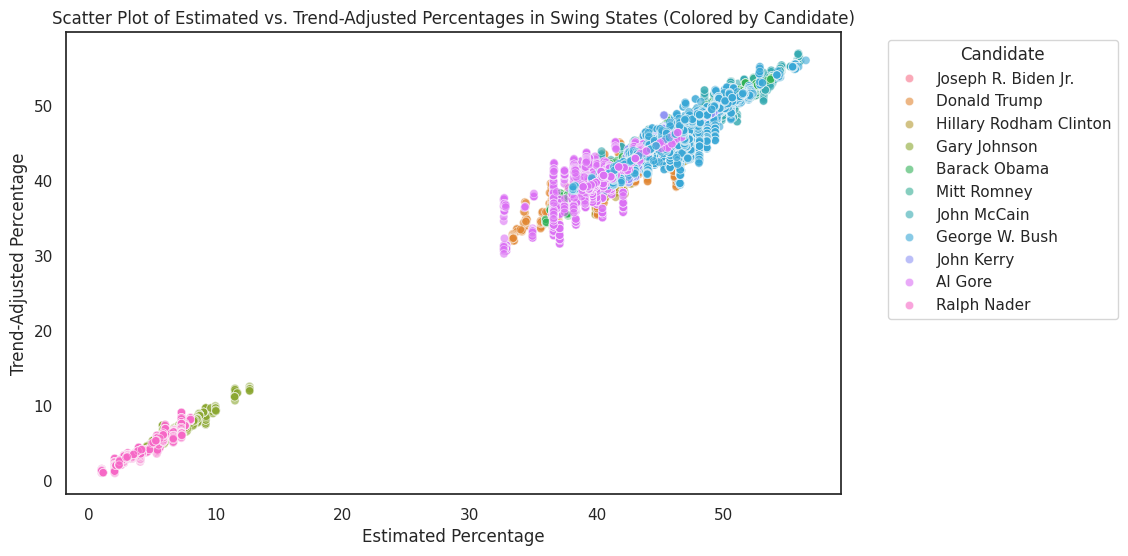

In [29]:
# Visualizing the correlation with different colors for each candidate
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pct_estimate', 
    y='pct_trend_adjusted', 
    data=swing_until_20, 
    hue='candidate_name',
    alpha=0.6
)
plt.title('Scatter Plot of Estimated vs. Trend-Adjusted Percentages in Swing States (Colored by Candidate)')
plt.xlabel('Estimated Percentage')
plt.ylabel('Trend-Adjusted Percentage')
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

The correlation between the estimated and trend-adjusted percentages is remarkably high at 99.5%, which is not surprising. However, despite the seemingly small average difference of around 0.25 percentage points, it could have significant implications in closely contested races, such as those anticipated in Nevada or Michigan.


We also look at the distribution of differences between the estimated and trend-adjusted percentages. If the differences are centered around zero with a narrow spread, it means that `pct_estimate` and `pct_trend_adjusted` are generally very close to each other. Analyzing this distribution helps us understand how significant or negligible the differences are, and whether using just the `pct_estimate` values would introduce any major issues or biases in our analysis.


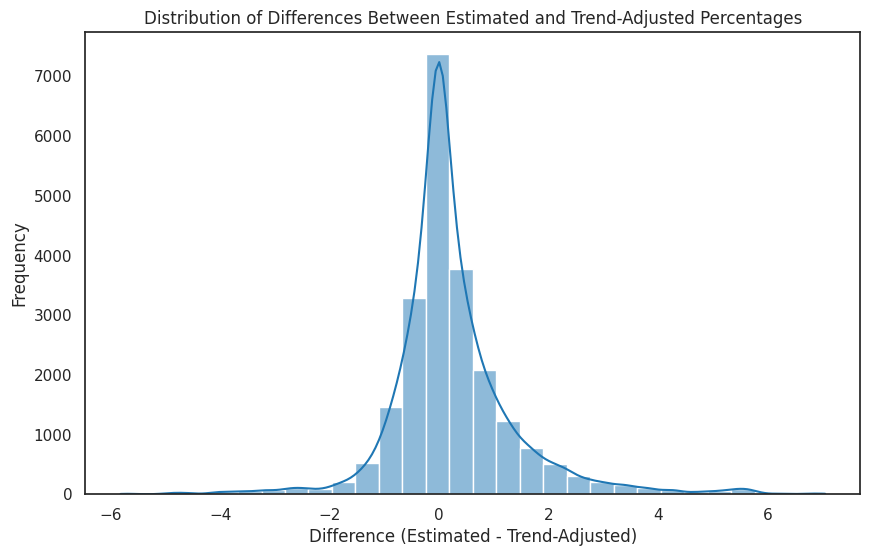

In [30]:
# Plotting the distribution of differences
swing_until_20['difference'] = swing_until_20['pct_estimate'] - swing_until_20['pct_trend_adjusted']
plt.figure(figsize=(10, 6))
sns.histplot(swing_until_20['difference'], bins=30, kde=True)
plt.title('Distribution of Differences Between Estimated and Trend-Adjusted Percentages')
plt.xlabel('Difference (Estimated - Trend-Adjusted)')
plt.ylabel('Frequency')
plt.show()

Since the majority of the differences are close to zero, it suggests that the `pct_estimate` values are a reasonable approximation of the `pct_trend_adjusted` values for most polling data.

Based on these analyses, **we can confidently use only the estimated percentage across all election cycles**. This approach maintains data consistency, which is essential in machine learning to avoid biases that could arise from inconsistent data processing methods.


## Adding party column and historical result data


To add a column for the political party, we start by extracting a list of all candidates from the historical dataset. Next, we create a dictionary mapping each candidate to their respective party. Finally, we convert this information into a DataFrame and merge it with `swing_until_20`.


In [31]:
# Get unique candidate names
candidate_names = swing_until_20['candidate_name'].unique().tolist()

# Create a party_map with checks for unmapped candidates
party_map = {
    'Joseph R. Biden Jr.': 'DEM',
    'Donald Trump': 'REP',
    'Hillary Rodham Clinton': 'DEM',
    'Gary Johnson': 'LIB',
    'Barack Obama': 'DEM',
    'Mitt Romney': 'REP',
    'John McCain': 'REP',
    'Ralph Nader': 'IND',
    'George W. Bush': 'REP',
    'John Kerry': 'DEM',
    'Al Gore': 'DEM'
}

# Add a default party for unmapped candidates
default_party = 'UNKNOWN'

# Create a DataFrame with candidates and their respective parties
candidate_df = pd.DataFrame(candidate_names, columns=['candidate_name'])
candidate_df['party'] = candidate_df['candidate_name'].map(party_map).fillna(default_party)

In [32]:
candidate_df.head()

candidate_name party
0     Joseph R. Biden Jr.   DEM
1            Donald Trump   REP
2  Hillary Rodham Clinton   DEM
3            Gary Johnson   LIB
4            Barack Obama   DEM

In [33]:
# Log unmapped candidates for review
unmapped_candidates = candidate_df[candidate_df['party'] == default_party]['candidate_name'].tolist()
if unmapped_candidates:
    print("Unmapped candidates found:", unmapped_candidates)
else:
    print("No unmapped candidate found.")

No unmapped candidate found.


In [34]:
# Merge the candidate_df with swing_until_20 on 'candidate_name' column
swing_until_20 = swing_until_20.merge(candidate_df[['candidate_name', 'party']], on='candidate_name', how='left')

In [35]:
# Merging results_until_20 to swing_until_20 with validation
swing_until_20 = pd.merge(
    swing_until_20,
    results_until_20,
    how='left',
    left_on=['cycle', 'state', 'party', 'candidate_name'],
    right_on=['cycle', 'state', 'party', 'candidate']
)

# Convert vote_share to a numeric format, replacing commas with periods
swing_until_20['vote_share'] = swing_until_20['vote_share'].str.replace(',', '.')
swing_until_20['vote_share'] = pd.to_numeric(swing_until_20['vote_share'], errors='coerce')

# Check for any missing vote_share values after the conversion
missing_vote_share = swing_until_20[swing_until_20['vote_share'].isna()]
if not missing_vote_share.empty:
    print("Rows with missing vote_share after conversion:\n", missing_vote_share)

Rows with missing vote_share after conversion:
        cycle           state  modeldate candidate_name  pct_estimate  \
3892    2016       Wisconsin 2016-03-30   Gary Johnson      9.198407   
3907    2016       Wisconsin 2016-03-31   Gary Johnson      9.198407   
3922    2016       Wisconsin 2016-04-01   Gary Johnson      9.198407   
3937    2016       Wisconsin 2016-04-02   Gary Johnson      9.198407   
3952    2016       Wisconsin 2016-04-03   Gary Johnson      9.198407   
...      ...             ...        ...            ...           ...   
22664   2000        Michigan 2000-11-07    Ralph Nader      3.512400   
22665   2000          Nevada 2000-11-07    Ralph Nader      3.011737   
22666   2000  North Carolina 2000-11-07    Ralph Nader      1.117046   
22667   2000    Pennsylvania 2000-11-07    Ralph Nader      4.144868   
22668   2000       Wisconsin 2000-11-07    Ralph Nader      5.263384   

       pct_trend_adjusted  difference party candidate  vote_share  
3892             9.

We also visualize the distribution of `vote_share` for all candidates combined. This helps us understand how vote shares are distributed across the entire dataset, showing the frequency of different vote share percentages and indicating any common patterns, such as whether most vote shares cluster around certain values.


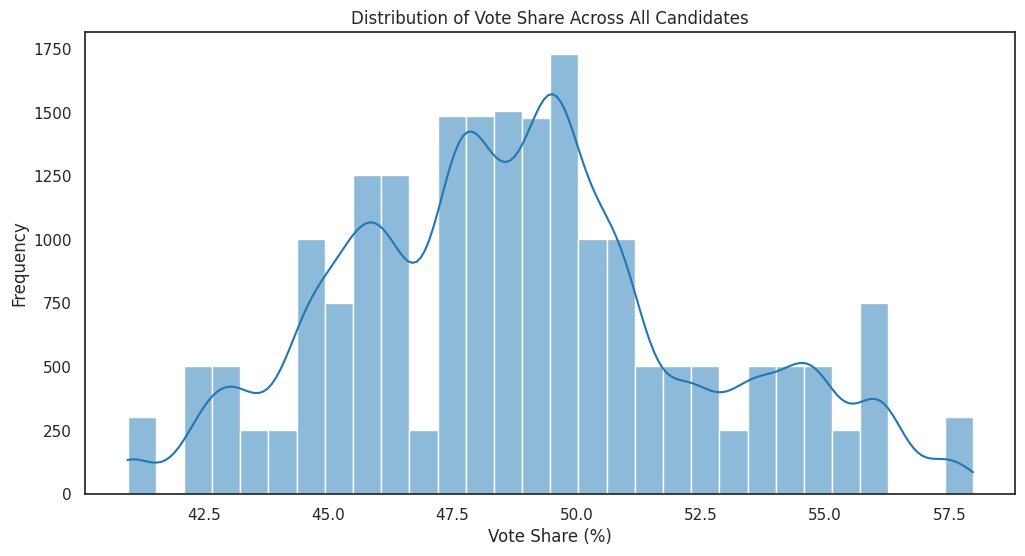

In [36]:
# Plot the distribution of vote_share for all data
plt.figure(figsize=(12, 6))
sns.histplot(swing_until_20['vote_share'], bins=30, kde=True)
plt.title('Distribution of Vote Share Across All Candidates')
plt.xlabel('Vote Share (%)')
plt.ylabel('Frequency')
plt.show()

Then we visualize the `vote_share` data by political party. This comparison helps us understand how vote shares vary between different parties, showing central tendencies, variability, and the presence of any outliers. The x-axis labels are rotated slightly for better readability.


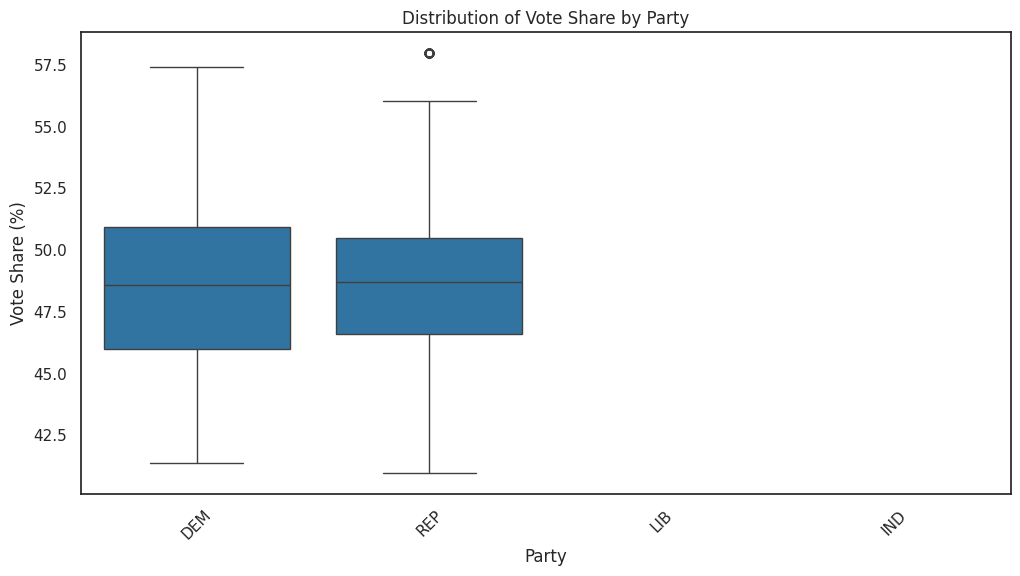

In [37]:
# Plot the distribution of vote_share by party
plt.figure(figsize=(12, 6))
sns.boxplot(x='party', y='vote_share', data=swing_until_20)
plt.title('Distribution of Vote Share by Party')
plt.xlabel('Party')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=45)
plt.show()

Lastly, we use a box plot to display the distribution of `vote_share` for each individual candidate. This visualization highlights the median, interquartile range, and any outliers for each candidate’s vote share, allowing us to compare how different candidates performed.


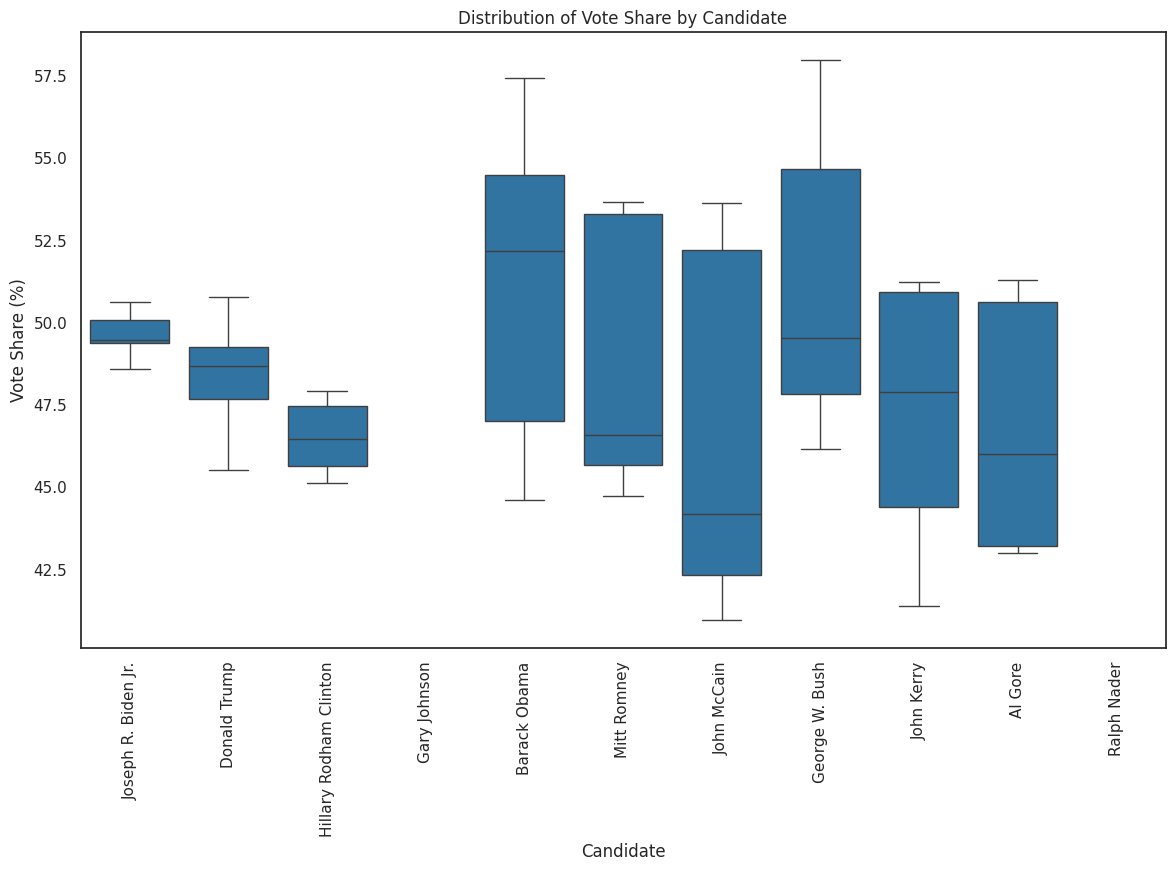

In [38]:
# Plot the distribution of vote_share by candidate
plt.figure(figsize=(14, 8))
sns.boxplot(x='candidate_name', y='vote_share', data=swing_until_20)
plt.title('Distribution of Vote Share by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=90)
plt.show()

These visualizations provide insights into the overall distribution of vote shares, as well as how these distributions differ between individual candidates and political parties.


## Cleaning up columns


To wrap up the EDA, we rename the `modeldate` column to `date`, drop any unnecessary columns, and update the candidate format in the 2024 data to include first names.


In [39]:
# Renaming columns in swing_until_20
swing_until_20.rename(columns={'modeldate': 'date'}, inplace=True)

# Keeping only relevant columns
swing_24 = swing_24[['cycle', 'date', 'state', 'party', 'candidate', 'pct_estimate']]
swing_until_20 = swing_until_20[['cycle', 'date', 'state', 'party', 'candidate', 'pct_estimate', 'vote_share']]

# Update candidate names in swing_24 dataframe
swing_24['candidate'] = swing_24['candidate'].replace({
    'Trump': 'Donald Trump',
    'Biden': 'Joseph R. Biden Jr.',
    'Harris': 'Kamala Harris',
    'Kennedy': 'Robert F. Kennedy'})

In [40]:
swing_24.head()

cycle       date    state party      candidate  pct_estimate
21300   2024 2024-10-29  Arizona   REP   Donald Trump      48.69350
21301   2024 2024-10-29  Arizona   DEM  Kamala Harris      46.83210
21302   2024 2024-10-28  Arizona   REP   Donald Trump      48.67395
21303   2024 2024-10-28  Arizona   DEM  Kamala Harris      46.77425
21304   2024 2024-10-27  Arizona   REP   Donald Trump      48.68695

# 2024 Campaign Overview


## Overview by swing states


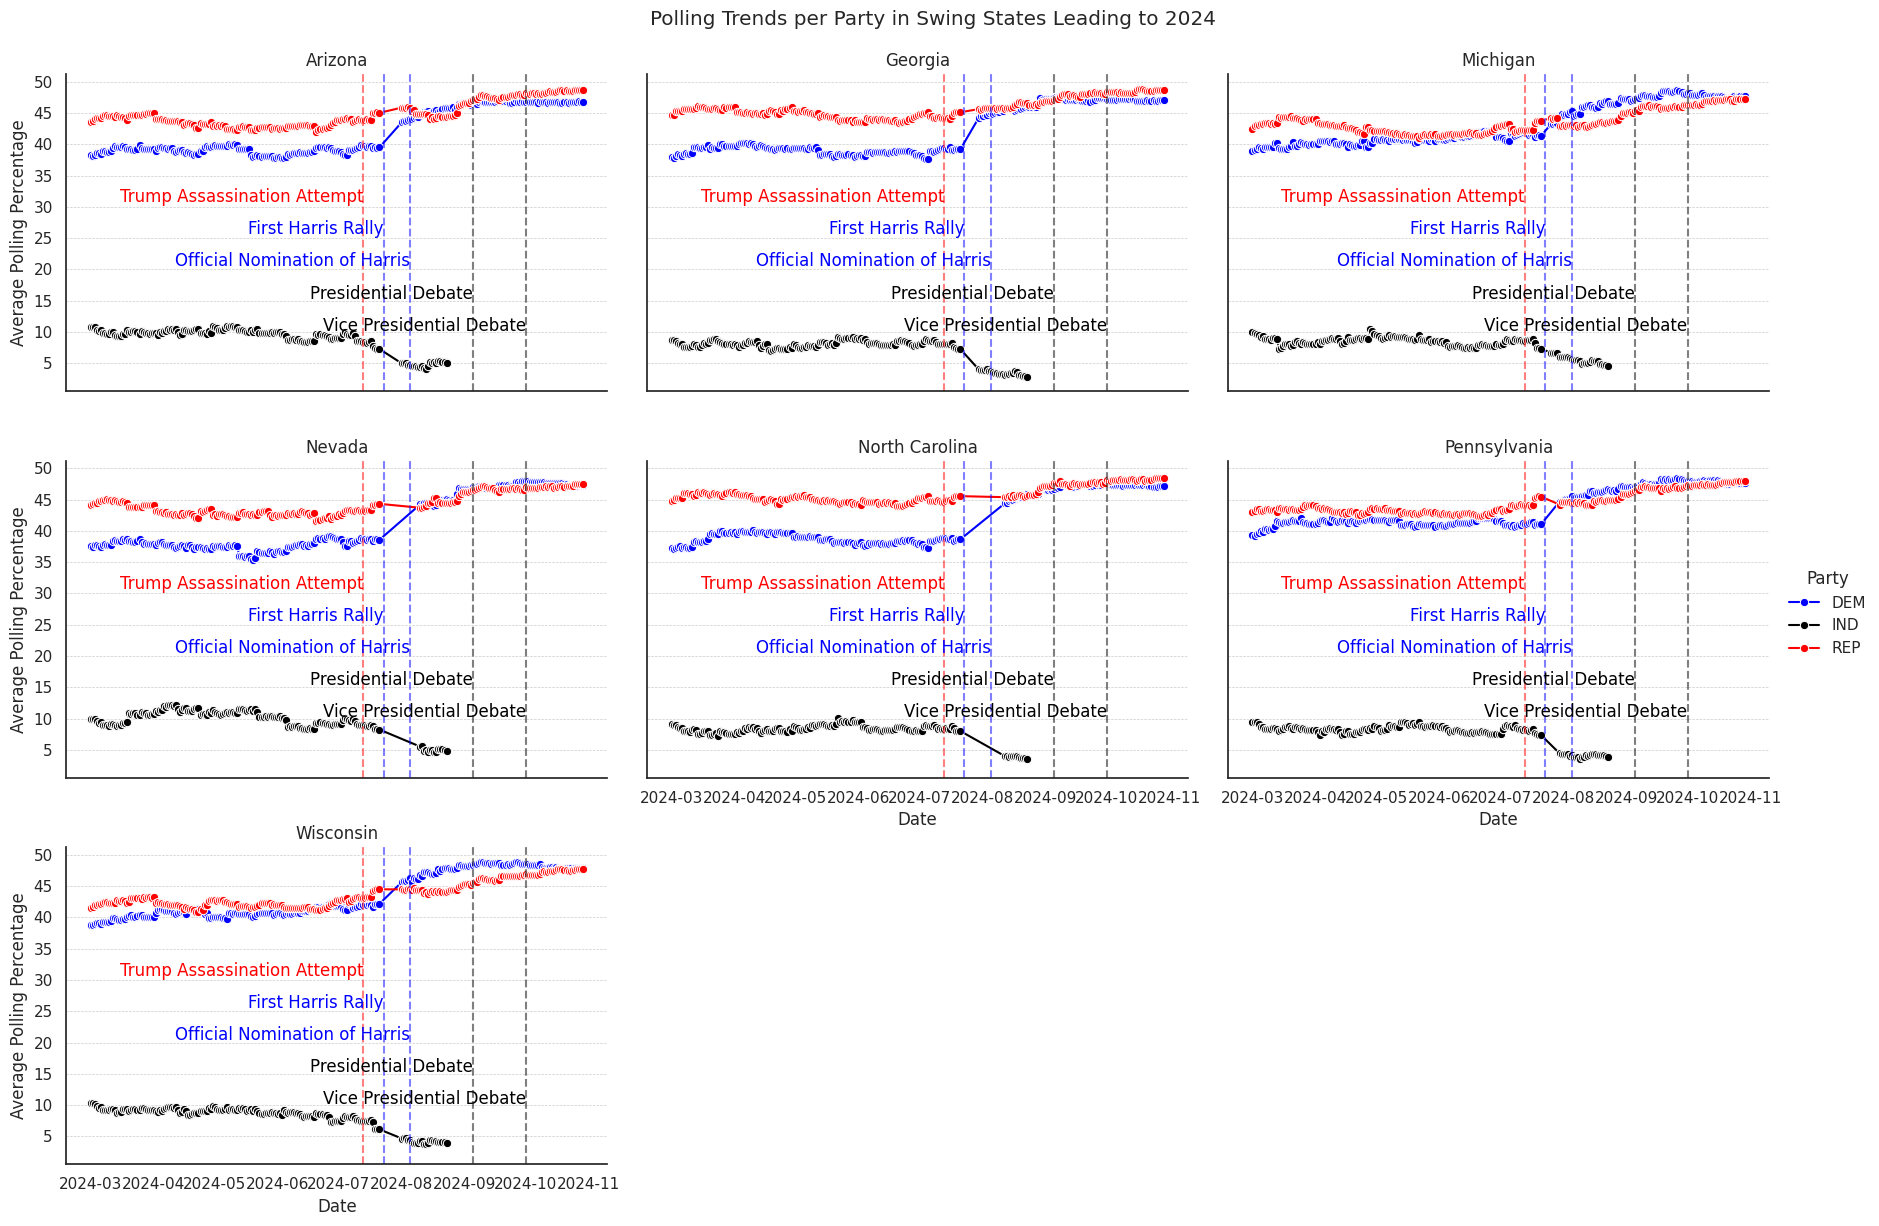

In [41]:
# Convert the date column to datetime format for accurate time series plotting
swing_24['date'] = pd.to_datetime(swing_24['date'])

# Aggregate data by date, state, and party to get average polling estimates
averaged_polling_data = swing_24.groupby(['date', 'state', 'party'])['pct_estimate'].mean().reset_index()

# Set up a grid of line plots for each state using seaborn's FacetGrid
facet = sns.FacetGrid(averaged_polling_data, col='state', col_wrap=3, height=4, aspect=1.5, sharey=True)
facet.map_dataframe(sns.lineplot, x='date', y='pct_estimate', hue='party', marker='o',
                    palette={'REP': 'red', 'DEM': 'blue', 'IND': 'black'})

# Add significant event markers to each subplot
significant_dates = [
    ('2024-07-13', 'Trump Assassination Attempt', 'red', 0.6),
    ('2024-07-23', 'First Harris Rally', 'blue', 0.5),
    ('2024-08-05', 'Official Nomination of Harris', 'blue', 0.4),
    ('2024-09-05', 'Presidential Debate', 'black', 0.3),
    ('2024-10-01', 'Vice Presidential Debate', 'black', 0.2)
]

for ax in facet.axes.flat:
    for date, label, color, text_y_pos in significant_dates:
        ax.axvline(pd.to_datetime(date), color=color, linestyle='--', alpha=0.5)
        ax.text(pd.to_datetime(date), ax.get_ylim()[1] * text_y_pos, label, color=color, ha='right')
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

# Add legend and set labels and titles
facet.add_legend(title='Party')
facet.set_titles("{col_name}")
facet.set_axis_labels("Date", "Average Polling Percentage")
facet.fig.suptitle('Polling Trends per Party in Swing States Leading to 2024', y=1.02)

plt.show()

## Overview across swing states


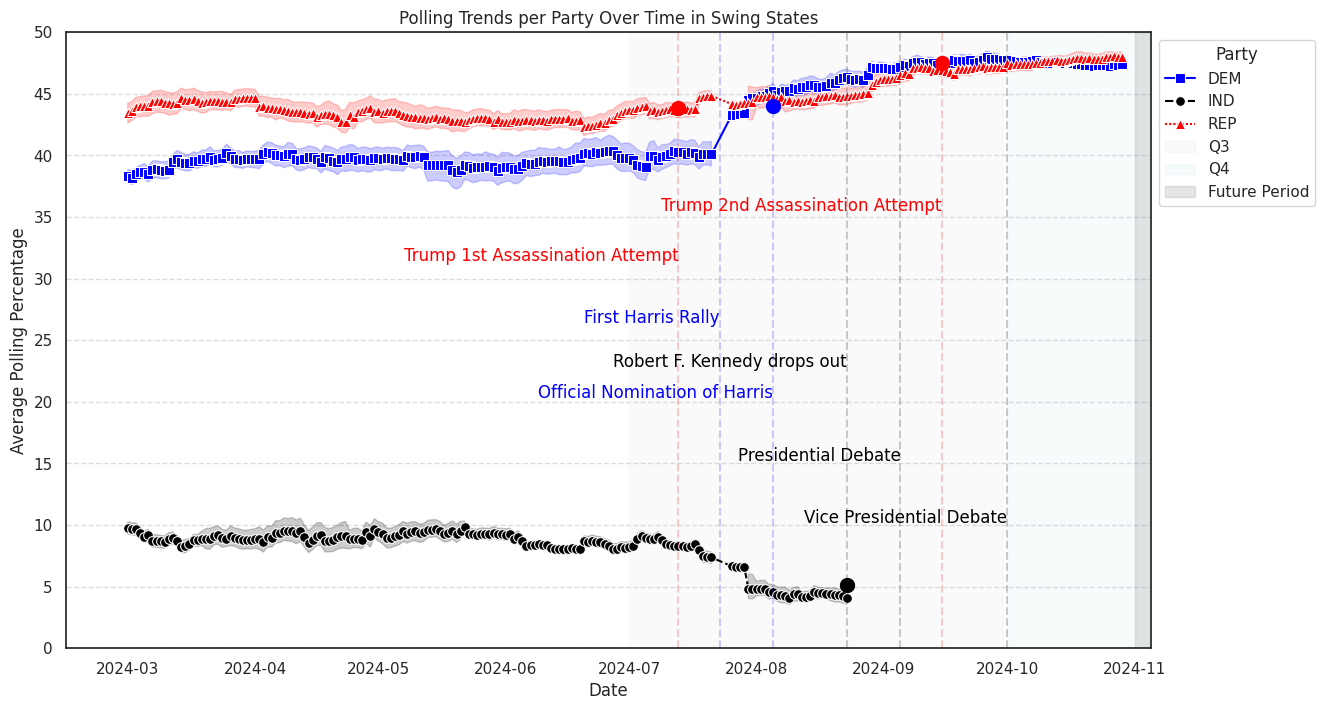

In [42]:
# Ensure 'date' column in the data is restricted to relevant period
start_date = '2024-02-15'
end_date = '2024-11-05'
averaged_polling_data = averaged_polling_data[(averaged_polling_data['date'] >= start_date) & 
                                              (averaged_polling_data['date'] <= end_date)]

# Set up the plot
plt.figure(figsize=(14, 8))

# Define custom markers for each party and use larger markers for key dates
markers = {'REP': '^', 'DEM': 's', 'IND': 'o'}
sns.lineplot(
    x='date', y='pct_estimate', data=averaged_polling_data,
    hue='party', style='party', markers=markers, markersize=7,
    palette={'REP': 'red', 'DEM': 'blue', 'IND': 'black'}
)

# Mark key dates with larger markers for emphasis
event_dates = [
    ('2024-07-13', 'Trump 1st Assassination Attempt', 'red', 0.62, 'REP'),
    ('2024-07-23', 'First Harris Rally', 'blue', 0.52, 'DEM'),
    ('2024-08-05', 'Official Nomination of Harris', 'blue', 0.4, 'DEM'),
    ('2024-08-23', 'Robert F. Kennedy drops out', 'black', 0.45, 'IND'),
    ('2024-09-05', 'Presidential Debate', 'black', 0.3, 'IND'),
    ('2024-09-15', 'Trump 2nd Assassination Attempt', 'red', 0.7, 'REP'),
    ('2024-10-01', 'Vice Presidential Debate', 'black', 0.2, 'IND')
]

for date, label, color, text_y_pos, party in event_dates:
    plt.axvline(pd.to_datetime(date), color=color, linestyle='--', alpha=0.2)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * text_y_pos, label, color=color, ha='right')
    
    # Plot large markers on event dates if data exists
    point_data = averaged_polling_data.loc[
        (averaged_polling_data['date'] == pd.to_datetime(date)) &
        (averaged_polling_data['party'] == party), 'pct_estimate'
    ]
    
    if not point_data.empty:
        plt.plot(pd.to_datetime(date), point_data.values[0], marker='o', markersize=10, color=color)

# Add background gradient for campaign phases or quarters
plt.axvspan(pd.to_datetime('2024-07-01'), pd.to_datetime('2024-09-30'), color='lightgray', alpha=0.1, label='Q3')
plt.axvspan(pd.to_datetime('2024-10-01'), pd.to_datetime('2024-12-31'), color='lightblue', alpha=0.1, label='Q4')

# Highlight current date and beyond with a shaded area
current_date = pd.to_datetime('2024-11-01')
plt.axvspan(current_date, pd.to_datetime(end_date), color='gray', alpha=0.2, label='Future Period')

# Limit x-axis to the year 2024
plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# Customize legend and add gridlines, labels, and titles
plt.legend(title='Party', loc='upper left', bbox_to_anchor=(1, 1))
plt.yticks(range(0, 51, 5))
plt.grid(visible=True, which='major', axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 50)
plt.title('Polling Trends per Party Over Time in Swing States')
plt.xlabel('Date')
plt.ylabel('Average Polling Percentage')

# Display the plot
plt.show()


In [44]:
!pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [45]:
import plotly.express as px

# Create an interactive plot using Plotly
fig = px.line(averaged_polling_data, x='date', y='pct_estimate', color='party', markers=True,
               title='Interactive Average Polling Percentage per Party Over Time in Swing States')
fig.update_layout(xaxis_title='Date', yaxis_title='Average Polling Percentage', yaxis=dict(range=[0, 50]))
fig.show()

Recent polling data for the 2024 presidential election indicates a highly competitive race across key swing states.


# Feature Engineering 


We consider four main types of features to boost the model's predictive capabilities: opponent-based, temporal, candidate-specific, and party-focused features.

- **Opponent-Based Features**: These features capture the dynamics of the electoral competition, allowing the model to consider how rival candidates influence each other's support.
- **Temporal Features**: These features represent time-related patterns, including seasonality and shifts in voter sentiment as the election nears, which can be vital for understanding how opinions evolve.
- **Candidate-Specific Features**: These features incorporate information about the candidates themselves, such as their incumbency status or their public reputation, which can influence voter behavior.
- **Party-Focused Features**: These features reflect broader trends and associations linked to political parties, helping the model contextualize voter preferences and partisan loyalty.


## Opponent-Based Features

A notable aspect of this year's election campaign is the influence of Robert F. Kennedy, who has garnered strikingly high polling numbers for an independent candidate. After he suspended his campaign on August 23rd, 2024, approval ratings for both Kamala Harris and Donald Trump rose.

To ensure our models do not make incorrect predictions, such as vote shares totaling more than 100%, we incorporate the third-party percentage as a feature.


In [48]:
# Adding the percentage of 3rd party candidates
swing_24['pct_3rd_party'] = swing_24.groupby(['cycle', 'date', 'state'])['pct_estimate'].transform(
    lambda x: x[~swing_24['party'].isin(['DEM', 'REP'])].sum()
)
swing_until_20['pct_3rd_party'] = swing_until_20.groupby(['cycle', 'date', 'state'])['pct_estimate'].transform(
    lambda x: x[~swing_until_20['party'].isin(['DEM', 'REP'])].sum()
)

Now that we have accounted for third-party support in our features, we acknowledge that, realistically, only the Democratic and Republican candidates have a viable chance of winning. Therefore, we exclude all candidates from other parties in both DataFrames.


In [49]:
# Removing observations of candidates who are not Democrats and Republicans
swing_24 = swing_24[swing_24['party'].isin(['DEM', 'REP'])]
swing_until_20 = swing_until_20[swing_until_20['party'].isin(['DEM', 'REP'])]

In [50]:
# Calculate the total percentage estimate for each group of (date, state)
swing_24['total_pct_estimate'] = swing_24.groupby(['date', 'state'])['pct_estimate'].transform('sum')
swing_until_20['total_pct_estimate'] = swing_until_20.groupby(['date', 'state'])['pct_estimate'].transform('sum')

# Calculate the percentage of the opponent as the total minus the candidate's percentage
swing_24['pct_opponent'] = swing_24['total_pct_estimate'] - swing_24['pct_estimate']
swing_until_20['pct_opponent'] = swing_until_20['total_pct_estimate'] - swing_until_20['pct_estimate']

# Calculate the lead against the opponent
swing_24['lead'] = swing_24['pct_estimate'] - swing_24['pct_opponent']
swing_until_20['lead'] = swing_until_20['pct_estimate'] - swing_until_20['pct_opponent']

# Drop the temporary total_pct_estimate column as it's no longer needed
swing_24.drop(columns=['total_pct_estimate'], inplace=True)
swing_until_20.drop(columns=['total_pct_estimate'], inplace=True)

In [51]:
swing_24.head()

cycle       date    state party      candidate  pct_estimate  \
21300   2024 2024-10-29  Arizona   REP   Donald Trump      48.69350   
21301   2024 2024-10-29  Arizona   DEM  Kamala Harris      46.83210   
21302   2024 2024-10-28  Arizona   REP   Donald Trump      48.67395   
21303   2024 2024-10-28  Arizona   DEM  Kamala Harris      46.77425   
21304   2024 2024-10-27  Arizona   REP   Donald Trump      48.68695   

       pct_3rd_party  pct_opponent    lead  
21300            0.0      46.83210  1.8614  
21301            0.0      48.69350 -1.8614  
21302            0.0      46.77425  1.8997  
21303            0.0      48.67395 -1.8997  
21304            0.0      46.87025  1.8167

## Temporal Features

In the feature engineering process, we design several features to effectively capture both the gradual trends and sudden shifts in voter preferences. Specifically, we incorporate features like the days remaining until the election, rolling and exponential moving averages of poll percentages grouped by party, and momentum indicators grouped by candidate.


In [52]:
# Election dates dictionary
election_dates = {
    2000: pd.to_datetime('2000-11-07'),
    2004: pd.to_datetime('2004-11-02'),
    2008: pd.to_datetime('2008-11-04'),
    2012: pd.to_datetime('2012-11-06'),
    2016: pd.to_datetime('2016-11-08'),
    2020: pd.to_datetime('2020-11-03')
}

# Assign election dates
swing_until_20['election_date'] = swing_until_20['cycle'].map(election_dates)
swing_24['election_date'] = pd.to_datetime('2024-11-05')

# Calculate days until election
swing_24['days_until_election'] = (swing_24['election_date'] - swing_24['date']).dt.days
swing_until_20['days_until_election'] = (swing_until_20['election_date'] - swing_until_20['date']).dt.days

In [53]:
# Sorting by date to ensure correct calculation of rolling averages
swing_24 = swing_24.sort_values(by='date')
swing_until_20 = swing_until_20.sort_values(by='date')

# Rolling average (7-day window) to smooth out short-term fluctuations
swing_24['rolling_avg_7d'] = swing_24.groupby(['state', 'party'])['pct_estimate'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)
swing_until_20['rolling_avg_7d'] = swing_until_20.groupby(['cycle', 'state', 'party'])['pct_estimate'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Exponential moving average (7-day span) to emphasize recent data
swing_24['exp_moving_avg_7d'] = swing_24.groupby(['state', 'party'])['pct_estimate'].transform(
    lambda x: x.ewm(span=7, adjust=False).mean()
)
swing_until_20['exp_moving_avg_7d'] = swing_until_20.groupby(['cycle', 'state', 'party'])['pct_estimate'].transform(
    lambda x: x.ewm(span=7, adjust=False).mean()
)

# Calculating momentum: daily change in poll estimates for each candidate
swing_24['momentum_candidate'] = swing_24.groupby(['state', 'party'])['pct_estimate'].diff()
swing_until_20['momentum_candidate'] = swing_until_20.groupby(['state', 'party'])['pct_estimate'].diff()

# Calculating momentum for the opponent
swing_24['momentum_opponent'] = swing_24.groupby(['state', 'party'])['pct_opponent'].diff()
swing_until_20['momentum_opponent'] = swing_until_20.groupby(['state', 'party'])['pct_opponent'].diff()

# Difference between candidate and opponent momentum
swing_24['momentum'] = swing_24['momentum_candidate'] - swing_24['momentum_opponent']
swing_until_20['momentum'] = swing_until_20['momentum_candidate'] - swing_until_20['momentum_opponent']

In [54]:
# Calculate the number of missing values in each column of swing_until_20
missing_values_until_20 = swing_until_20.isnull().sum()
missing_values_24 = swing_24.isnull().sum()

# Filter out columns that have no missing values
missing_values_until_20 = missing_values_until_20[missing_values_until_20 > 0]
missing_values_24 = missing_values_24[missing_values_24 > 0]

# Display the columns with at least 1 missing value and their respective counts for both dataframes
print(missing_values_until_20, missing_values_24)

momentum_candidate    14
momentum_opponent     14
momentum              14
dtype: int64 momentum_candidate    14
momentum_opponent     14
momentum              14
dtype: int64


In [55]:
swing_24.head()

cycle       date      state party            candidate  pct_estimate  \
29080   2024 2024-03-01  Wisconsin   DEM  Joseph R. Biden Jr.      38.85280   
25774   2024 2024-03-01    Georgia   DEM  Joseph R. Biden Jr.      38.05170   
25772   2024 2024-03-01    Georgia   REP         Donald Trump      44.67220   
27209   2024 2024-03-01     Nevada   REP         Donald Trump      44.09815   
27211   2024 2024-03-01     Nevada   DEM  Joseph R. Biden Jr.      37.54365   

       pct_3rd_party  pct_opponent     lead election_date  \
29080      10.309000      41.58205 -2.72925    2024-11-05   
25774       8.669465      44.67220 -6.62050    2024-11-05   
25772       8.669465      38.05170  6.62050    2024-11-05   
27209       9.935160      37.54365  6.55450    2024-11-05   
27211       9.935160      44.09815 -6.55450    2024-11-05   

       days_until_election  rolling_avg_7d  exp_moving_avg_7d  \
29080                  249        38.85280           38.85280   
25774                  249        38.05170           38.05170   
25772                  249        44.67220           44.67220   
27209                  249        44.09815           44.09815   
27211                  249        37.54365           37.54365   

       momentum_candidate  momentum_opponent  momentum  
29080                 NaN                NaN       NaN  
25774                 NaN                NaN       NaN  
25772                 NaN                NaN       NaN  
27209                 NaN                NaN       NaN  
27211                 NaN                NaN       NaN

In [56]:
swing_until_20.head()

cycle       date     state party       candidate  pct_estimate  \
18376   2000 2000-03-02   Georgia   DEM         Al Gore     38.331447   
18369   2000 2000-03-02   Arizona   REP  George W. Bush     49.331729   
18370   2000 2000-03-02   Georgia   REP  George W. Bush     48.701464   
18371   2000 2000-03-02  Michigan   REP  George W. Bush     47.362261   
18372   2000 2000-03-02    Nevada   REP  George W. Bush     47.118648   

       vote_share  pct_3rd_party  pct_opponent       lead election_date  \
18376       42.98            0.0     48.701464 -10.370017    2000-11-07   
18369       51.02            0.0     36.635157  12.696572    2000-11-07   
18370       54.67            0.0     38.331447  10.370017    2000-11-07   
18371       46.15            0.0     39.611895   7.750366    2000-11-07   
18372       49.52            0.0     35.048154  12.070494    2000-11-07   

       days_until_election  rolling_avg_7d  exp_moving_avg_7d  \
18376                  250       38.331447          38.331447   
18369                  250       49.331729          49.331729   
18370                  250       48.701464          48.701464   
18371                  250       47.362261          47.362261   
18372                  250       47.118648          47.118648   

       momentum_candidate  momentum_opponent  momentum  
18376                 NaN                NaN       NaN  
18369                 NaN                NaN       NaN  
18370                 NaN                NaN       NaN  
18371                 NaN                NaN       NaN  
18372                 NaN                NaN       NaN

The momentums are the only columns with missing values. This makes sense since it’s derived from the daily difference in poll values for each candidate. As a result, the first observation for each candidate won’t have a momentum value. We can easily handle this by removing the missing entries.


In [57]:
# Dropping missing values
swing_24 = swing_24.dropna()
swing_until_20 = swing_until_20.dropna()

In [58]:
# Check for missing values again
missing_values_until_20 = swing_until_20.isnull().sum()
missing_values_24 = swing_24.isnull().sum()

# Filter out columns that have no missing values
missing_values_until_20 = missing_values_until_20[missing_values_until_20 > 0]
missing_values_24 = missing_values_24[missing_values_24 > 0]

# Display the columns with at least 1 missing value and their respective counts for both dataframes
print(missing_values_until_20, missing_values_24)

Series([], dtype: int64) Series([], dtype: int64)


## Candidate-Specific Features

For each candidate, we start by creating two binary features indicating whether a candidate is the incumbent President or the incumbent Vice President. This allows our models to incorporate the influence of the candidate’s presidential history.


In [59]:
# Defining incumbent presidents and vice-presidents
incumbent_presidents = {
    2000: 'Bill Clinton',
    2004: 'George W. Bush',
    2008: 'George W. Bush',
    2012: 'Barack Obama',
    2016: 'Barack Obama',
    2020: 'Donald Trump',
    2024: 'Joseph R. Biden Jr.'
}
incumbent_vice_presidents = {
    2000: 'Al Gore',
    2004: 'Richard Cheney',
    2008: 'Richard Cheney',
    2012: 'Joseph R. Biden Jr.',
    2016: 'Joseph R. Biden Jr.',
    2020: 'Mike Pence',
    2024: 'Kamala Harris'
}

In [60]:
# Convert the incumbent dictionaries into Pandas Series for efficient lookups
incumbent_presidents_series = pd.Series(incumbent_presidents)
incumbent_vice_presidents_series = pd.Series(incumbent_vice_presidents)

# Adding is_incumbent_president column using vectorized comparison
swing_until_20['is_incumbent_president'] = (
    swing_until_20['cycle'].map(incumbent_presidents_series) == swing_until_20['candidate']
).astype(int)
swing_24['is_incumbent_president'] = (
    swing_24['cycle'].map(incumbent_presidents_series) == swing_24['candidate']
).astype(int)

# Adding is_incumbent_vice_president column using vectorized comparison
swing_until_20['is_incumbent_vice_president'] = (
    swing_until_20['cycle'].map(incumbent_vice_presidents_series) == swing_until_20['candidate']
).astype(int)
swing_24['is_incumbent_vice_president'] = (
    swing_24['cycle'].map(incumbent_vice_presidents_series) == swing_24['candidate']
).astype(int)

In [61]:
swing_24.head()

cycle       date           state party            candidate  \
24802   2024 2024-03-02         Arizona   DEM  Joseph R. Biden Jr.   
26200   2024 2024-03-02        Michigan   DEM  Joseph R. Biden Jr.   
26198   2024 2024-03-02        Michigan   REP         Donald Trump   
27722   2024 2024-03-02  North Carolina   REP         Donald Trump   
27208   2024 2024-03-02          Nevada   DEM  Joseph R. Biden Jr.   

       pct_estimate  pct_3rd_party  pct_opponent     lead election_date  \
24802      38.17665      10.800100       43.7130 -5.53635    2024-11-05   
26200      39.08530       9.846470       42.8867 -3.80140    2024-11-05   
26198      42.88670       9.846470       39.0853  3.80140    2024-11-05   
27722      44.91025       9.016095       37.0336  7.87665    2024-11-05   
27208      37.36180       9.882920       44.3238 -6.96200    2024-11-05   

       days_until_election  rolling_avg_7d  exp_moving_avg_7d  \
24802                  248       38.229875          38.256488   
26200                  248       39.035100          39.010000   
26198                  248       42.703200          42.611450   
27722                  248       44.838250          44.802250   
27208                  248       37.452725          37.498188   

       momentum_candidate  momentum_opponent  momentum  \
24802            -0.10645            0.07790  -0.18435   
26200             0.10040            0.36700  -0.26660   
26198             0.36700            0.10040   0.26660   
27722             0.14400           -0.18885   0.33285   
27208            -0.18185            0.22565  -0.40750   

       is_incumbent_president  is_incumbent_vice_president  
24802                       1                            0  
26200                       1                            0  
26198                       0                            0  
27722                       0                            0  
27208                       1                            0

From a methodological standpoint, it is not neccessary to generate a dummy feature for candidates who are not participating in the 2024 election or who are first-time nominees in 2024. As a result, we will limit the creation of these features to Donald Trump and Joe Biden, as we have relevant data for each from the 2016 and 2020 elections, respectively.


In [62]:
# Create a feature for candidates from 2024 who were candidates in earlier cycles
swing_24['candidate_Donald Trump'] = swing_24['candidate'].eq('Donald Trump')
swing_until_20['candidate_Donald Trump'] = swing_until_20['candidate'].eq('Donald Trump')
swing_24['candidate_Joseph R. Biden Jr.'] = swing_24['candidate'].eq('Joseph R. Biden Jr.')
swing_until_20['candidate_Joseph R. Biden Jr.'] = swing_until_20['candidate'].eq('Joseph R. Biden Jr.')

## Party-Focused Features


We also include a feature for party incumbency, which indicates whether the party currently in power is running for re-election. This feature captures the impact of historical voting patterns and voter attitudes toward the incumbent party. By recognizing these trends, our models may better predict vote shares, as voter sentiment can be influenced by the performance and public perception of the party in office.


In [63]:
incumbent_party = {
    2000: 'DEM',
    2004: 'REP',
    2008: 'REP',
    2012: 'DEM',
    2016: 'DEM',
    2020: 'REP',
    2024: 'DEM'
}

In [64]:
incumbent_party_series = pd.Series(incumbent_party)

# Adding is_incumbent_party column using vectorized comparison
swing_until_20['is_incumbent_party'] = (
    swing_until_20['party'] == swing_until_20['cycle'].map(incumbent_party_series)
).astype(int)
swing_24['is_incumbent_party'] = (
    swing_24['party'] == swing_24['cycle'].map(incumbent_party_series)
).astype(int)

# Create duplicate party column for one-hot encoding
swing_24['party_dummy'] = swing_24['party']
swing_until_20['party_dummy'] = swing_until_20['party']

# One-hot encode the duplicate party column in swing_24 and swing_until_20
swing_24 = pd.get_dummies(swing_24, columns=['party_dummy'], prefix='party')
swing_until_20 = pd.get_dummies(swing_until_20, columns=['party_dummy'], prefix='party')

In [65]:
# Getting description of distributions in swing_until_20
swing_until_20[['pct_estimate', 'lead', 'pct_3rd_party', 'momentum', 'vote_share']].describe()

pct_estimate          lead  pct_3rd_party      momentum    vote_share
count  20574.000000  2.057400e+04   20574.000000  2.057400e+04  20574.000000
mean      44.730071  3.868027e-17       1.246011 -6.907191e-19     48.851285
std        3.886883  6.579927e+00       2.658129  4.704214e-01      3.593641
min       32.645213 -1.800585e+01       0.000000 -8.451756e+00     40.958314
25%       42.074642 -4.928655e+00       0.000000 -1.416500e-02     46.172866
50%       44.989044  7.105427e-15       0.000000  0.000000e+00     48.671616
75%       47.432821  4.928655e+00       0.000000  1.416500e-02     50.771326
max       56.473480  1.800585e+01      12.667460  8.451756e+00     57.974757

In [66]:
# Getting description of distributions in swing_24
swing_24[['pct_estimate', 'lead', 'pct_3rd_party','momentum']].describe()

pct_estimate          lead  pct_3rd_party      momentum
count   3228.000000  3.228000e+03    3228.000000  3.228000e+03
mean      43.529680 -1.760949e-16       5.873588 -1.320711e-17
std        3.219809  3.626564e+00       4.046225  4.509074e-01
min       35.392700 -8.765400e+00       0.000000 -6.278600e+00
25%       41.062838 -2.072412e+00       0.000000 -1.179625e-01
50%       43.764350  0.000000e+00       8.010367 -7.105427e-15
75%       46.560725  2.072413e+00       8.913020  1.179625e-01
max       48.891800  8.765400e+00      12.172050  6.278600e+00

# Predicting The 2024 US Elections Results


Our prediction strategy acknowledges that **polls reflect public sentiment at specific moments and are not definitive indicators of election outcomes**. As such, we will avoid simplistic time-series models that forecast future results based solely on past polling data. Instead, we will employ a `regression-based approach` that predicts the election outcome for each individual polling observation, rather than attempting to project an entire timeline of poll data.

Given the unique political dynamics of each state, we will develop separate models for each swing state. Developing separate models for each swing state is a common approach in election forecasting, acknowledging the unique political dynamics of each state. For instance, [FiveThirtyEight's election forecast models](https://projects.fivethirtyeight.com/2024-swing-the-election/) incorporate state-specific factors to account for local variations in political behavior.

To avoid data leakage and honor the chronological order of events, we will ensure that our models are trained on data from previous election cycles and tested only on future, unseen data. This setup will help us evaluate how well the models generalize to new election scenarios.

Our primary evaluation criterion will be the `number of correctly predicted winners`, as the winner-takes-all nature of state elections makes this the most crucial metric. As a secondary measure, we will use the `Mean Absolute Error (MAE)` to quantify the average difference between the predicted and actual vote shares in percentage points. MAE is straightforward to interpret and relevant to our context, as it shows how much our predictions deviate from the real outcomes on average.

In addition to our regression models, we will experiment with an `ensemble method using a stacking regressor` to combine the strengths of multiple models and improve prediction accuracy. Finally, we will train the optimal model for each state on all available data up to 2020 and use it to forecast the 2024 election results. We will also apply `time-based weighting` with an exponential decay function to prioritize more recent polling data in our predictions.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/AQd68PNgkzjPWGkJgL_JXg/Playground.png" width="70%" alt="Training and Choosing Best Models">


## Training and choosing the best models 


In [67]:
# Importing models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Importing other necessary libraries
from sklearn.metrics import mean_absolute_error
import numpy as np

In [68]:
# Initialize a list to store results
results_list = []

# Define the election cycles
cycles = [2000, 2004, 2008, 2012, 2016, 2020]

# Define the features
features = [
    'pct_estimate', 'pct_opponent', 'pct_3rd_party', 'lead', 'rolling_avg_7d', 'exp_moving_avg_7d',
    'days_until_election', 'momentum_candidate', 'momentum_opponent', 'momentum',
    'is_incumbent_president', 'is_incumbent_vice_president', 'is_incumbent_party',
    'candidate_Donald Trump', 'party_DEM', 'party_REP'
]

# Define base models for stacking
base_models = [
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge(alpha=1.0)),
    ('ElasticNet', ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)),
    ('Lasso', Lasso(alpha=0.1, random_state=42)),
    ('KNeighbors', KNeighborsRegressor(n_neighbors=5)),
    ('MLPRegressor', MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)),
    ('SVR', SVR(kernel='rbf', C=1.0, epsilon=0.1)),
    ('DecisionTree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
]

# Define the meta model and stacking model
meta_model = Ridge(alpha=1.0)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Define the weight function to assign more importance to polls conducted closer to the election date
def compute_weight(days_until_election, k):
    return np.exp(-k * days_until_election)

Below we will start the training loop for all models. The training can take up to 7-10 minutes. Please be patient.


In [69]:
# Outer loop: test cycles starting from 2004
# The outer loop iterates over each election cycle, starting from 2004, treating each one as a "test cycle" 
# and using all preceding cycles as "training cycles." 
# This ensures that predictions for a given election year are only based on data from earlier years, 
# mimicking a real-world scenario where future events are not known in advance. 
# For each test cycle, the code loops through each swing state to isolate the data relevant to that state, 
# apply time-based weighting to account for the varying importance of polling data as the election approaches, 
# and split the data into training and testing sets.

# Iterate over election cycles, starting from the second one
for index in range(1, len(cycles)):
    current_test_cycle = cycles[index]
    previous_train_cycles = cycles[:index]  # All prior cycles are used for training

    print(f"\nEvaluating Test Cycle: {current_test_cycle} with Training Cycles: {previous_train_cycles}")

    # Loop through each swing state
    for current_state in swing_states:
        print(f"\n  Analyzing State: {current_state}")

        # Extract data specific to the current state
        state_data = swing_until_20[swing_until_20['state'] == current_state].copy()

        # Calculate weights based on the number of days until the election
        state_data['weight'] = compute_weight(state_data['days_until_election'], k=0.1)

        # Split the data into training and testing sets based on the election cycle
        training_set = state_data[state_data['cycle'].isin(previous_train_cycles)]
        testing_set = state_data[state_data['cycle'] == current_test_cycle]

        # Identify features and the target variable
        X_train = training_set[features]
        y_train = training_set['vote_share']
        X_test = testing_set[features]

        # Define a dictionary of models for evaluation
        model_dict = {
            'LinearRegression': LinearRegression(),
            'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
            'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
            'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
            'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
            'KNeighbors': KNeighborsRegressor(n_neighbors=5),
            'MLPRegressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
            'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
            'StackingModel': stacking_model
        }

        # Train and evaluate each model
        for name, model_instance in model_dict.items():
            print(f"    Training: {name}")

            # Fit the model to the training data
            model_instance.fit(X_train, y_train)

            # Make predictions on the testing data
            testing_set[f'predicted_{name}'] = model_instance.predict(X_test)

            # Calculate weighted predictions for each party
            weighted_predictions = testing_set.groupby('party').apply(
                lambda group: np.average(
                    group[f'predicted_{name}'],
                    weights=group['weight'])
            ).reset_index(name='aggregated_prediction')

            # Compute actual vote shares for comparison
            actual_shares = testing_set.groupby('party')['vote_share'].mean().reset_index()
            result_comparison = pd.merge(weighted_predictions, actual_shares, on='party')
            result_comparison.rename(columns={'vote_share': 'actual_vote_share'}, inplace=True)

            # Compute the Mean Absolute Error
            error = mean_absolute_error(result_comparison['actual_vote_share'], result_comparison['aggregated_prediction'])

            # Determine if the predicted winner matches the actual winner
            predicted_party = result_comparison.loc[result_comparison['aggregated_prediction'].idxmax(), 'party']
            actual_party = result_comparison.loc[result_comparison['actual_vote_share'].idxmax(), 'party']
            is_correct = int(predicted_party == actual_party)

            # Save the results
            results_list.append({
                'state': current_state,
                'model_name': name,
                'test_cycle': current_test_cycle,
                'MAE': error,
                'correct_winner': is_correct
            })

            print(f"    {name}: MAE = {error}, Correct Winner = {is_correct}")


Evaluating Test Cycle: 2004 with Training Cycles: [2000]

  Analyzing State: Pennsylvania
    Training: LinearRegression
    LinearRegression: MAE = 1.6799876450000362, Correct Winner = 1
    Training: XGBoost
    XGBoost: MAE = 3.243703007548845, Correct Winner = 1
    Training: RandomForest
    RandomForest: MAE = 1.4089376449999058, Correct Winner = 1
    Training: GradientBoosting
    GradientBoosting: MAE = 1.7732117106187815, Correct Winner = 1
    Training: AdaBoost
    AdaBoost: MAE = 1.1587376449998565, Correct Winner = 1
    Training: SVR
    SVR: MAE = 1.3905074299564717, Correct Winner = 0
    Training: KNeighbors
    KNeighbors: MAE = 0.40269281326830964, Correct Winner = 1
    Training: MLPRegressor
    MLPRegressor: MAE = 2.12270739676962, Correct Winner = 1
    Training: ElasticNet
    ElasticNet: MAE = 1.4030597284017539, Correct Winner = 0
    Training: StackingModel
    StackingModel: MAE = 1.7810988247219122, Correct Winner = 1

  Analyzing State: Wisconsin
    Tra

In [70]:
# Convert the results list into a DataFrame
evaluation_results = pd.DataFrame(results_list)

# Aggregate the results: calculate the total number of correctly predicted winners and average MAE for each state-model combination
aggregated_results = evaluation_results.groupby(['state', 'model_name']).agg(
    total_correct_winners=('correct_winner', 'sum'),
    average_MAE=('MAE', 'mean')
).reset_index()

# Output the maximum number of correct winners for each state
max_correct_winners = aggregated_results.groupby('state')['total_correct_winners'].max()
print("Maximum Correct Winners per State:")
print(max_correct_winners)

# Output the minimum MAE for each state
min_mae_per_state = aggregated_results.groupby('state')['average_MAE'].min()
print("\nMinimum MAE per State:")
print(min_mae_per_state)

Maximum Correct Winners per State:
state
Arizona           5
Georgia           5
Michigan          4
Nevada            5
North Carolina    4
Pennsylvania      4
Wisconsin         4
Name: total_correct_winners, dtype: int64

Minimum MAE per State:
state
Arizona           1.473542
Georgia           0.773166
Michigan          2.693380
Nevada            2.028420
North Carolina    1.365016
Pennsylvania      1.877343
Wisconsin         2.772964
Name: average_MAE, dtype: float64


### Understanding the metrics

1. **Correct Winner Count** (`max_correct_winners`)
   - This metric represents the maximum number of times a model accurately predicted the winner in each state across multiple election cycles.
   - For example:
     - In Arizona, the best-performing model correctly predicted the winner 5 times.
     - In Georgia, the best model also had 5 correct predictions.
     - In states like Michigan, North Carolina, Pennsylvania, and Wisconsin, the best models had 4 correct predictions.

2. **Mean Absolute Error** (`min_mae_per_state`)
   - This metric represents the average error in the model’s prediction of vote shares for each state. A lower MAE indicates more precise predictions.
   - For example:
     - In Georgia, the model achieved the lowest MAE of approximately 0.773, meaning the model’s predictions were quite accurate.
     - Wisconsin had a higher MAE of approximately 2.773, indicating less precise predictions compared to other states.


In [71]:
# Sort the models for each state: prioritize by the number of correct winners (descending) and then by MAE (ascending)
sorted_models = aggregated_results.sort_values(
    by=['state', 'total_correct_winners', 'average_MAE'], 
    ascending=[True, False, True]
)

# Initialize a dictionary to store the best model for each state
optimal_models = {}

# Identify and store the top model for each state
for state in sorted_models['state'].unique():
    best_model = sorted_models[sorted_models['state'] == state].iloc[0]
    optimal_models[state] = best_model['model_name']

optimal_models

{'Arizona': 'GradientBoosting',
 'Georgia': 'ElasticNet',
 'Michigan': 'LinearRegression',
 'Nevada': 'KNeighbors',
 'North Carolina': 'XGBoost',
 'Pennsylvania': 'KNeighbors',
 'Wisconsin': 'MLPRegressor'}

### Understanding how best model for each swing state is chosen

The best model for each state is selected based on two main criteria:

1. **Number of Correct Predictions**: The model that correctly predicts the winner the highest number of times across different election cycles (`max_correct_winners`) is given priority. This ensures that the model chosen has a strong track record of accurately identifying the winner for that state.

2. **Lowest Average MAE**: Among models with the same number of correct predictions, the model with the lowest Mean Absolute Error (`min_mae_per_state`) is selected. This criterion ensures that the chosen model not only predicts the winner correctly but also makes precise predictions in terms of vote shares. Lower MAE indicates that the model's vote share estimates are more accurate.

#### How the Selection Works

1. The models for each state are first ranked based on the `max_correct_winners` metric in descending order.
2. If there is a tie (i.e., multiple models have the same `max_correct_winners` value), the models are then compared based on the `min_mae_per_state` in ascending order. The model with the lowest MAE is selected as the best one.

#### Example

- If two models for Arizona both have `max_correct_winners = 5` but different MAEs, the model with the lower MAE will be chosen.
- In a case where one model has `max_correct_winners = 5` and another has `max_correct_winners = 4`, the model with `max_correct_winners = 5` will be chosen, regardless of MAE, because the number of correct predictions takes precedence.


As we can see, the `stacking_model` was not chosen for any of the state. Its underperformance in this scenario is likely due to its complexity and the limited amount of election data available. Stacking models combine multiple predictions using a meta-model, which can lead to overfitting, especially when there are not enough data points to train effectively. Simpler models like `KNeighbors` or `LinearRegression` may have done better because they require fewer parameters and are better at capturing straightforward patterns.

Another reason is that each state has unique voting dynamics. The stacking model, designed to generalize across all states, may have struggled to capture these differences, whereas simpler models could adapt more easily to specific state trends. Additionally, the stacking model might not have made the best use of the features, particularly if there were complex interactions that simpler models handled more efficiently.


## Perform prediction for the US 2024 election in swing states


With the best model identified for each swing state, we can proceed to predict the outcome of the 2024 campaign.


In [72]:
# Initialize a dictionary to store prediction results
predicted_results = {
    'state': [],
    'party': [],
    'predicted_vote_share': [],
    'model_name': []
}

# Iterate over each state and its corresponding best model from optimal_models
for state, model_name in optimal_models.items():
    print(f"Predicting for {state} using {model_name}")

    # Filter training data (2000-2020) and testing data (2024) for the specific state
    train_data_state = swing_until_20[swing_until_20['state'] == state].copy()
    test_data_state = swing_24[swing_24['state'] == state].copy()

    # Compute weights for the test data based on days until the election
    test_data_state['weight'] = compute_weight(test_data_state['days_until_election'], k=0.1)

    # Define the features to use for the model
    feature_columns = [
        'pct_estimate', 'pct_opponent', 'pct_3rd_party', 'lead', 'rolling_avg_7d', 'exp_moving_avg_7d',
        'days_until_election', 'momentum_candidate', 'momentum_opponent', 'momentum',
        'is_incumbent_president', 'is_incumbent_vice_president', 'is_incumbent_party',
        'candidate_Donald Trump', 'party_DEM', 'party_REP'
    ]

    # Prepare the feature and target datasets
    X_train = train_data_state[feature_columns]
    y_train = train_data_state['vote_share']
    X_test = test_data_state[feature_columns]

    # Retrieve and fit the best model for this state
    selected_model = model_dict[model_name]  # Updated to use model_dict
    selected_model.fit(X_train, y_train)

    # Make predictions on the 2024 test data
    test_data_state['predicted_vote_share'] = selected_model.predict(X_test)

    # Aggregate predictions by party, weighted by days until the election
    party_predictions = (
        test_data_state
        .groupby('party')
        .apply(lambda group: np.average(group['predicted_vote_share'], weights=group['weight']))
        .reset_index(name='aggregated_prediction')
    )

    # Save each prediction in the dictionary
    for _, row in party_predictions.iterrows():
        predicted_results['state'].append(state)
        predicted_results['party'].append(row['party'])
        predicted_results['predicted_vote_share'].append(row['aggregated_prediction'])
        predicted_results['model_name'].append(model_name)

Predicting for Arizona using GradientBoosting
Predicting for Georgia using ElasticNet
Predicting for Michigan using LinearRegression
Predicting for Nevada using KNeighbors
Predicting for North Carolina using XGBoost
Predicting for Pennsylvania using KNeighbors
Predicting for Wisconsin using MLPRegressor


In [73]:
# Convert the predicted_results dictionary to a DataFrame
predictions_df = pd.DataFrame(predicted_results)

# Add a rank to predictions_df for each state based on the predicted_vote_share in descending order
predictions_df['rank'] = predictions_df.groupby('state')['predicted_vote_share'].rank(ascending=False)

# Create a pivot table with states as the index and parties as columns, displaying predicted vote share
predictions_pivot = predictions_df.pivot(index='state', columns='party', values='predicted_vote_share')

# Display the 2024 vote share predictions
print("\n2024 Vote Share Predictions:")
predictions_pivot


2024 Vote Share Predictions:


party                 DEM        REP
state                               
Arizona         49.448388  49.130186
Georgia         48.968525  50.094087
Michigan        49.381316  45.438234
Nevada          50.895925  47.063103
North Carolina  48.403390  50.420452
Pennsylvania    50.063520  50.174798
Wisconsin       50.583540  47.905749

The predictions confirm our expectation of a highly competitive race in the swing states. Our models project four states to give their majority vote to Kamala Harris (Arizona, Michigan, Nevada, Wisconsin) and three to Donald Trump (Georgia, North Carolina and Pennsylvania). The states of Pennsylvania and Arizona are anticipated to be especially tight, with the difference between both predicted vote shares being only 0.11 and 0.32 percentage points, respectively.


In [74]:
# Define the number of electoral votes per state for the 2024 US-Presidential elections
electoral_votes = {
    'Alabama': 9, 'Alaska': 3, 'Arizona': 11, 'Arkansas': 6, 'California': 54, 'Colorado': 10, 'Connecticut': 7,
    'Delaware': 3, 'District of Columbia': 3, 'Florida': 30, 'Georgia': 16, 'Hawaii': 4, 'Idaho': 4, 'Illinois': 19,
    'Indiana': 11, 'Iowa': 6, 'Kansas': 6, 'Kentucky': 8, 'Louisiana': 8, 'Maine': 2, 'Maryland': 10, 'Massachusetts': 11,
    'Michigan': 15, 'Minnesota': 10, 'Mississippi': 6, 'Missouri': 10, 'Montana': 4, 'Nebraska': 2, 'Nevada': 6,
    'New Hampshire': 4, 'New Jersey': 14, 'New Mexico': 5, 'New York': 28, 'North Carolina': 16, 'North Dakota': 3,
    'Ohio': 17, 'Oklahoma': 7, 'Oregon': 8, 'Pennsylvania': 19, 'Rhode Island': 4, 'South Carolina': 9, 'South Dakota': 3,
    'Tennessee': 11, 'Texas': 40, 'Utah': 6, 'Vermont': 3, 'Virginia': 13, 'Washington': 12, 'West Virginia': 4,
    'Wisconsin': 10, 'Wyoming': 3
}

# Create a DataFrame from the dictionary
electoral_votes_df = pd.DataFrame(list(electoral_votes.items()), columns=['state', 'electoral_votes'])

# Handle states that divide their votes into multiple districts
# Maine and Nebraska are the only states that do this
districts = {
    'ME-1': 1, 'ME-2': 1, 'NE-1': 1, 'NE-2': 1, 'NE-3': 1
}

# Add the districts to the DataFrame
districts_df = pd.DataFrame(list(districts.items()), columns=['state', 'electoral_votes'])

# Combine the two DataFrames
electoral_votes_df = pd.concat([electoral_votes_df, districts_df], ignore_index=True)

# Display the DataFrame
electoral_votes_df

state  electoral_votes
0                Alabama                9
1                 Alaska                3
2                Arizona               11
3               Arkansas                6
4             California               54
5               Colorado               10
6            Connecticut                7
7               Delaware                3
8   District of Columbia                3
9                Florida               30
10               Georgia               16
11                Hawaii                4
12                 Idaho                4
13              Illinois               19
14               Indiana               11
15                  Iowa                6
16                Kansas                6
17              Kentucky                8
18             Louisiana                8
19                 Maine                2
20              Maryland               10
21         Massachusetts               11
22              Michigan               15
23             Minnesota               10
24           Mississippi                6
25              Missouri               10
26               Montana                4
27              Nebraska                2
28                Nevada                6
29         New Hampshire                4
30            New Jersey               14
31            New Mexico                5
32              New York               28
33        North Carolina               16
34          North Dakota                3
35                  Ohio               17
36              Oklahoma                7
37                Oregon                8
38          Pennsylvania               19
39          Rhode Island                4
40        South Carolina                9
41          South Dakota                3
42             Tennessee               11
43                 Texas               40
44                  Utah                6
45               Vermont                3
46              Virginia               13
47            Washington               12
48         West Virginia                4
49             Wisconsin               10
50               Wyoming                3
51                  ME-1                1
52                  ME-2                1
53                  NE-1                1
54                  NE-2                1
55                  NE-3                1

We can then put all the counts together to see the final results.


In [75]:
# Extract states where the top-ranked party is DEM and REP
additional_blue_states = [state for state in predictions_df.loc[(predictions_df['party'] == 'DEM') & (predictions_df['rank'] == 1), 'state']]
additional_red_states = [state for state in predictions_df.loc[(predictions_df['party'] == 'REP') & (predictions_df['rank'] == 1), 'state']]

# Combine blue_states and additional_blue_states into a single set to avoid duplicates
harris_states = set(blue_states).union(additional_blue_states)
trump_states = set(red_states).union(additional_red_states)

# Sum electoral votes for each candidate
sum_harris_electoral_votes = electoral_votes_df.loc[electoral_votes_df['state'].isin(harris_states), 'electoral_votes'].sum()
sum_trump_electoral_votes = electoral_votes_df.loc[electoral_votes_df['state'].isin(trump_states), 'electoral_votes'].sum()

# Determine the winner and loser
if sum_harris_electoral_votes > sum_trump_electoral_votes:
    winner = "Kamala Harris"
    winner_votes = sum_harris_electoral_votes
    loser = "Donald Trump"
    loser_votes = sum_trump_electoral_votes
else:
    winner = "Donald Trump"
    winner_votes = sum_trump_electoral_votes
    loser = "Kamala Harris"
    loser_votes = sum_harris_electoral_votes

# Print the results
print(f'{winner} will win the election with {winner_votes} electoral votes, and {loser} will lose with {loser_votes} electoral votes.')

Donald Trump will win the election with 270 electoral votes, and Kamala Harris will lose with 268 electoral votes.


<figure>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/cO-FlC-Jg0YFHl8ceOy98g/map.png" width="70%" alt="prediction_map">
</figure>

Map made with this interactive [tool](https://www.270towin.com/) 


# Addons


## Addon 1: Introducing more features


In this addon, you will create a new feature called `polling_volume` to measure the number of polls conducted within a specific timeframe for each state. This feature can provide insights into how public or media interest varies over time and may influence voter sentiment or campaign strategies.


In [76]:
swing_until_20['polling_volume'] = swing_until_20.groupby(['state', 'date'])['party'].transform('count')
swing_24['polling_volume'] = swing_24.groupby(['state', 'date'])['party'].transform('count')

## Addon 2: Hyperparameter tuning the models


In the lab, when choosing the best model for each swing state, we could use hyperparameter tuning to optimize each model’s performance. Try using [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) in the training loop to perform hyperparameter tuning and see if the results will change!


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for models
param_grids = {
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'SVR': {
        'C': [0.1, 1.0, 10.0],
        'epsilon': [0.01, 0.1, 1.0],
        'kernel': ['linear', 'rbf']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance']
    },
    'MLPRegressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [200, 500, 1000]
    },
    'ElasticNet': {
        'alpha': [0.1, 1.0, 10.0],
        'l1_ratio': [0.2, 0.5, 0.8]
    }
}

...

        # Inner loop: train each model and evaluate
        for model_name, model in models.items():
            print(f"    Training Model: {model_name}")

            # Perform hyperparameter tuning if the model has a parameter grid
            if model_name in param_grids:
                grid_search = GridSearchCV(
                    model, param_grids[model_name], cv=3, scoring='neg_mean_absolute_error'
                )
                grid_search.fit(X_train, y_train)
                model = grid_search.best_estimator_  # Use the best model from grid search
                print(f"    Best Parameters for {model_name}: {grid_search.best_params_}")
            else:
                model.fit(X_train, y_train)  # Train the model without tuning

...

## References

1. [*How our US 2024 election prediction model works*](https://www.economist.com/interactive/us-2024-election/prediction-model/president/how-this-works).

2. [ *Cyclical feature engineering example in Scikit-Learn*](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html).
3. [*A review of election prediction methods*](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/widm.1249).

4. [*Comparing regression and classification on US elections data with TensorFlow estimators*](https://cloud.google.com/blog/products/gcp/comparing-regression-and-classification-on-us-elections-data-with-tensorflow-estimators).

5. [*A Data Scientist's Guide to Understanding Election Predictions*](https://www.udacity.com/blog/2024/11/a-data-scientists-guide-to-understanding-election-predictions.html).

6. [*Predicting US election outcomes with machine learning*](https://www.datacamp.com/tutorial/us-election-predictions).

7. [*Election prediction models using machine learning techniques*](https://arxiv.org/abs/2312.05584).
